In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funcoes import *
from funcoes import read_QE_band as readband
from wulffpack import SingleCrystal

# BULK

In [4]:
DOS_colors = [
    '#BFEFFF',  # Bright Light Blue
    '#87CEFA',  # Bright Medium Blue
    'blue',  # Bright Dark Blue
    '0.7',  # Bright Light Grey
    '0.5',  # Same Medium Grey
    '0.2',  # Bright Dark Grey
    '#D2B48C',  #  Light brown
    '#8B4513',  # Medium brown
    '#D2B48C'   #  Dark brown
] #chatGPT

In [5]:
bandas = readband(r'CsPbBr3/band-cspbbr3.gnu')

In [9]:
dos = pd.read_csv(r'CsPbBr3/dos_CsPbBr3.txt', sep = ' ')
dos_cs_s = pd.read_csv(r'CsPbBr3/DOS-Cs-s.txt', sep = ' ')
dos_cs_p = pd.read_csv(r'CsPbBr3/DOS-Cs-p.txt', sep = ' ')
dos_cs_d = pd.read_csv(r'CsPbBr3/DOS-Cs-d.txt', sep = ' ')
dos_pb_s = pd.read_csv(r'CsPbBr3/DOS-Pb-s.txt', sep = ' ')
dos_pb_p = pd.read_csv(r'CsPbBr3/DOS-Pb-p.txt', sep = ' ')
dos_pb_d = pd.read_csv(r'CsPbBr3/DOS-Pb-d.txt', sep = ' ')
dos_br_s = pd.read_csv(r'CsPbBr3/DOS-Br-s.txt', sep = ' ')
dos_br_p = pd.read_csv(r'CsPbBr3/DOS-Br-p.txt', sep = ' ')
dos_objects = [dos_cs_s, dos_cs_p, dos_cs_d, dos_pb_s, dos_pb_p, dos_pb_d, dos_br_s, dos_br_p]
dos_legends = ['Cs (s)', 'Cs (p)', 'Cs (d)', 'Pb (s)', 'Pb (p)', 'Pb (d)', 'Br (s)', 'Br (p)']

In [10]:
DOS = dos['dos(E)']
E = dos['E(eV)']

In [11]:
indices = list(bandas['k'])
len(indices)

101

indice: 80
Band Gap = 1.6869 eV
pos bandas:  3.1919 e 4.8788


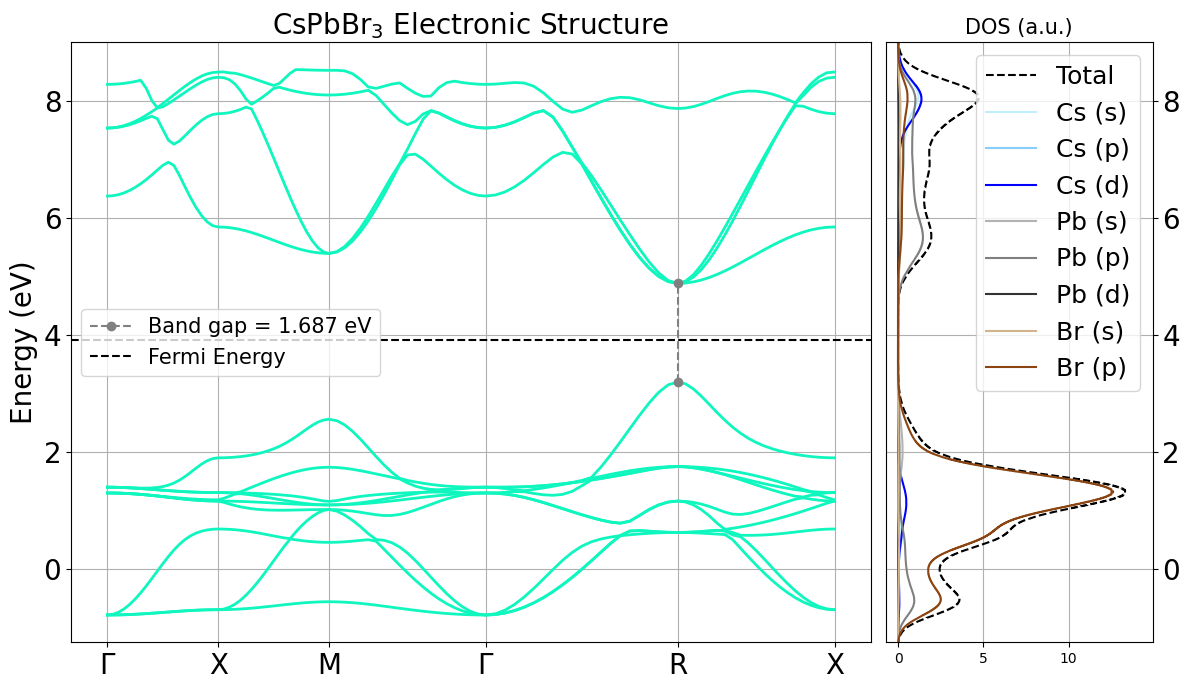

In [14]:
nbnd = len(bandas.keys())-1
k_nodes = [indices[0], indices[20], indices[40], indices[60], indices[80], indices[-1]]

fig, (ax, ax_dos) = plt.subplots(1, 2, figsize=(12, 7), gridspec_kw={'width_ratios': [3, 1]})

for i in range(13,nbnd):
    ax.plot(bandas['k'], bandas['e'+str(i)], c = '#0ff6be', linewidth = 2)
    
#ax.plot(bandas['k'], bandas['e21'], c = '0.7', linewidth = 1.5) #Valence band
#ax.plot(bandas['k'], bandas['e22'], c = '0.7', linewidth = 1.5) # conduction band
fermi = 3.9128
# Band Gap:
bg = min(np.array(bandas['e22'])- np.array(bandas['e21']))
print('indice:', list(np.array(bandas['e22'])- np.array(bandas['e21'])).index(bg))
print('Band Gap =', bg, 'eV')
x1, y1 = bandas['k'][80], bandas['e21'][80]
x2, y2 = bandas['k'][80], bandas['e22'][80]
print('pos bandas: ',y1,'e', y2)
ax.plot([x1, x2], [y1, y2], color='0.5', linestyle='--', marker='o', label=f'Band gap = {bg:.3f} eV')
ax.set_xticks(k_nodes)
ax.set_xticklabels(["$\Gamma$","X","M", "$\Gamma$", 'R', 'X'], fontsize = 20)
ax.grid('--')
ax.set_title(r'CsPbBr$_3$ Electronic Structure', fontsize = 20)
ax.axhline(fermi, linestyle = '--', color = '0', label = 'Fermi Energy')
ax.legend(loc = 'center left', fontsize = 15)
ax.set_ylabel('Energy (eV)', fontsize = 20)
ax.tick_params(axis='y', labelsize=20)
#DOS
ax_dos.set_title('DOS (a.u.)', fontsize = 15)
#ax_dos.set_xlim(0,3)
ax_dos.plot(DOS, E, color='0', label='Total', linestyle = '--')
for i in range(8):
    ax_dos.plot(np.array(dos_objects[i]['pdos(E)']) ,np.array(dos_objects[i]['E(eV)']), label = dos_legends[i], c= DOS_colors[i])
    ax_dos.yaxis.set_label_position("right")
    ax_dos.legend(loc='upper right', fontsize = 18)
    ax_dos.grid('--')
    ax_dos.yaxis.tick_right()
fig.subplots_adjust(wspace=0.05) 
ax_dos.set_ylim(ax.get_ylim())  
ax_dos.tick_params(axis='y', labelsize=20)
#ax_dos.tick_params(axis='x', labelsize=18)
plt.tight_layout()

plt.savefig('CsPbBr3/banda_CsPbBr3.png', dpi = 200)

# Surface Bands

## 001-1-2

In [8]:
bandas = readband(r'CsPbBr3/001/1-2/band-CsPbBr3-001-1-2.gnu')

In [9]:
dos = pd.read_csv(r'CsPbBr3/001/1-2/dos_CsPbBr3-001-1-2.txt', sep = ' ')
dos_cs_s = pd.read_csv(r'CsPbBr3/001/1-2/DOS-Cs-s.txt', sep = ' ')
dos_cs_p = pd.read_csv(r'CsPbBr3/001/1-2/DOS-Cs-p.txt', sep = ' ')
dos_cs_d = pd.read_csv(r'CsPbBr3/001/1-2/DOS-Cs-d.txt', sep = ' ')
dos_pb_s = pd.read_csv(r'CsPbBr3/001/1-2/DOS-Pb-s.txt', sep = ' ')
dos_pb_p = pd.read_csv(r'CsPbBr3/001/1-2/DOS-Pb-p.txt', sep = ' ')
dos_pb_d = pd.read_csv(r'CsPbBr3/001/1-2/DOS-Pb-d.txt', sep = ' ')
dos_br_s = pd.read_csv(r'CsPbBr3/001/1-2/DOS-Br-s.txt', sep = ' ')
dos_br_p = pd.read_csv(r'CsPbBr3/001/1-2/DOS-Br-p.txt', sep = ' ')
dos_objects = [dos_cs_s, dos_cs_p, dos_cs_d, dos_pb_s, dos_pb_p, dos_pb_d, dos_br_s, dos_br_p]
dos_legends = ['Cs (s)', 'Cs (p)', 'Cs (d)', 'Pb (s)', 'Pb (p)', 'Pb (d)', 'Br (s)', 'Br (p)']

In [10]:
DOS = dos['dos(E)']
E = dos['E(eV)']
indices = list(bandas['k'])
len(indices)

61

indice: 50


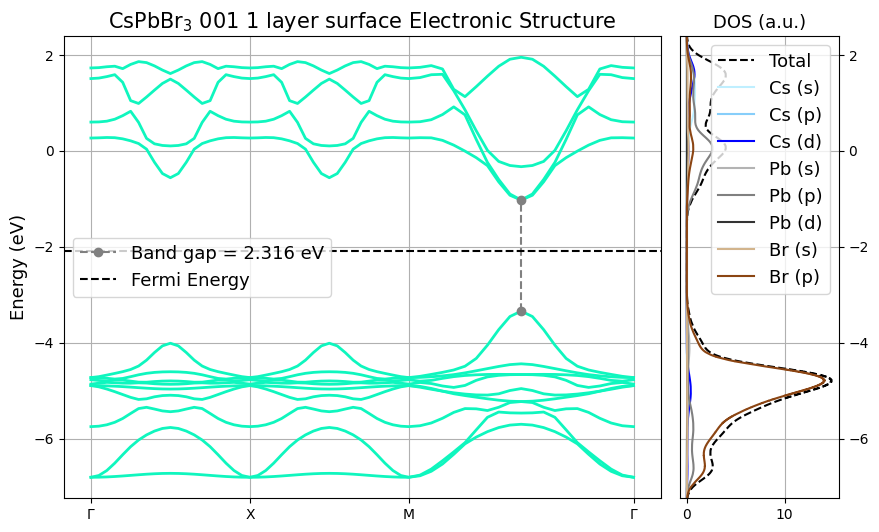

In [11]:
nbnd = len(bandas.keys())-1
k_nodes = [indices[0], indices[20], indices[40], indices[60]] 
#print(k_nodes)

fig, (ax, ax_dos) = plt.subplots(1, 2, figsize=(10, 6), gridspec_kw={'width_ratios': [3, 0.8]})

for i in range(13,nbnd):
#for i in range(0,nbnd):
    ax.plot(bandas['k'], bandas['e'+str(i)], c = '#0ff6be', linewidth = 2)
    
#ax.plot(bandas['k'], bandas['e21'], c = '0.7', linewidth = 1.5) #Valence band
#ax.plot(bandas['k'], bandas['e22'], c = '0.7', linewidth = 1.5) # conduction band

fermi = -2.0874

# Band Gap:
bg = min(list(np.array(bandas['e22'])- np.array(bandas['e21'])))
print('indice:', list(np.array(bandas['e22'])- np.array(bandas['e21'])).index(bg))
x1, y1 = bandas['k'][50], bandas['e21'][50]
x2, y2 = bandas['k'][50], bandas['e22'][50]
ax.plot([x1, x2], [y1, y2], color='0.5', linestyle='--', marker='o', label=f'Band gap = {bg:.3f} eV')

#print('Band Gap =', bg, 'eV')

ax.set_xticks(k_nodes)
ax.set_xticklabels(["$\Gamma$","X","M","$\Gamma$"])
ax.grid('--')
ax.set_title(r'CsPbBr$_3$ 001 1 layer surface Electronic Structure', fontsize = 15)
ax.axhline(fermi, linestyle = '--', color = '0', label = 'Fermi Energy')
ax.legend(loc = 'center left', fontsize = 13)
ax.set_ylabel('Energy (eV)', fontsize = 13)

#DOS
ax_dos.set_title('DOS (a.u.)', fontsize = 13)
#ax_dos.set_xlim(0,3)
ax_dos.plot(DOS, E, color='0', label='Total', linestyle = '--')
for i in range(8):
    ax_dos.plot(np.array(dos_objects[i]['pdos(E)']),np.array(dos_objects[i]['E(eV)']), label = dos_legends[i], c= DOS_colors[i])
    ax_dos.yaxis.set_label_position("right")
    ax_dos.legend(loc='upper right', fontsize = 13)
    ax_dos.grid('--')
    ax_dos.yaxis.tick_right()
fig.subplots_adjust(wspace=0.05) 
ax_dos.set_ylim(ax.get_ylim())  

plt.savefig(r'CsPbBr3/001/1-2/banda_CsPbBr3-001-1-2.png', dpi = 200)

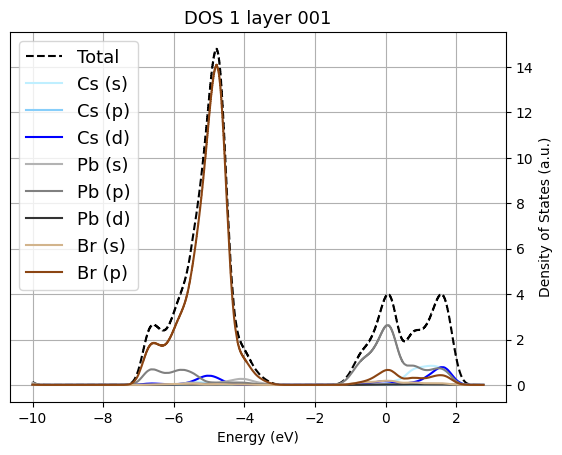

In [12]:
fig, ax_dos = plt.subplots(1,1)
ax_dos.set_title('DOS (a.u.)', fontsize = 13)
#ax_dos.set_xlim(0,3)
ax_dos.plot(E,DOS, color='0', linewidth=1.5,linestyle = '--', label='Total')
for i in range(8):
    ax_dos.plot(np.array(dos_objects[i]['E(eV)']), np.array(dos_objects[i]['pdos(E)']), label = dos_legends[i], c= DOS_colors[i])
    ax_dos.yaxis.set_label_position("right")
    ax_dos.legend(loc='upper left', fontsize = 13)
    ax_dos.grid('--')
    ax_dos.yaxis.tick_right()
fig.subplots_adjust(wspace=0.05)
ax_dos.set_title('DOS 1 layer 001', fontsize = 13)
ax_dos.set_xlabel('Energy (eV)')
ax_dos.set_ylabel('Density of States (a.u.)')
plt.savefig('CsPbBr3/001/1-2/DOS_001-1-2.png', dpi = 200)

## 001-1-4

In [13]:
bandas = readband(r'CsPbBr3/001/1-4/band-CsPbBr3-001-1-4.gnu')

In [14]:
dos = pd.read_csv(r'CsPbBr3/001/1-4/dos_CsPbBr3-001-1-4.txt', sep = ' ')
dos_cs_s = pd.read_csv(r'CsPbBr3/001/1-4/DOS-Cs-s.txt', sep = ' ')
dos_cs_p = pd.read_csv(r'CsPbBr3/001/1-4/DOS-Cs-p.txt', sep = ' ')
dos_cs_d = pd.read_csv(r'CsPbBr3/001/1-4/DOS-Cs-d.txt', sep = ' ')
dos_pb_s = pd.read_csv(r'CsPbBr3/001/1-4/DOS-Pb-s.txt', sep = ' ')
dos_pb_p = pd.read_csv(r'CsPbBr3/001/1-4/DOS-Pb-p.txt', sep = ' ')
dos_pb_d = pd.read_csv(r'CsPbBr3/001/1-4/DOS-Pb-d.txt', sep = ' ')
dos_br_s = pd.read_csv(r'CsPbBr3/001/1-4/DOS-Br-s.txt', sep = ' ')
dos_br_p = pd.read_csv(r'CsPbBr3/001/1-4/DOS-Br-p.txt', sep = ' ')
dos_objects = [dos_cs_s, dos_cs_p, dos_cs_d, dos_pb_s, dos_pb_p, dos_pb_d, dos_br_s, dos_br_p]
dos_legends = ['Cs (s)', 'Cs (p)', 'Cs (d)', 'Pb (s)', 'Pb (p)', 'Pb (d)', 'Br (s)', 'Br (p)']

In [15]:
DOS = dos['dos(E)']
E = dos['E(eV)']
indices = list(bandas['k'])
len(indices)

61

indice: 50


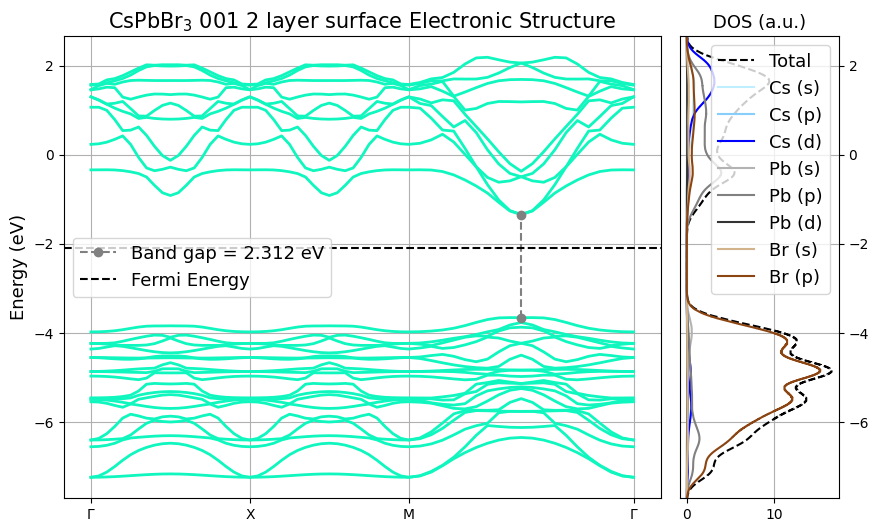

In [16]:
nbnd = len(bandas.keys())-1
k_nodes = [indices[0], indices[20], indices[40], indices[60]] 
#print(k_nodes)

fig, (ax, ax_dos) = plt.subplots(1, 2, figsize=(10, 6), gridspec_kw={'width_ratios': [3, 0.8]})

for i in range(26,nbnd):
#for i in range(0,nbnd):
    ax.plot(bandas['k'], bandas['e'+str(i)], c = '#0ff6be', linewidth = 2)
    
#ax.plot(bandas['k'], bandas['e43'], c = '0.7', linewidth = 1.5) #Valence band
#ax.plot(bandas['k'], bandas['e44'], c = '0.7', linewidth = 1.5) # conduction band

fermi = -2.0986

# Band Gap:
bg = min(np.array(bandas['e44'])- np.array(bandas['e43']))
print('indice:', list(np.array(bandas['e44'])- np.array(bandas['e43'])).index(bg))
x1, y1 = bandas['k'][50], bandas['e43'][50]
x2, y2 = bandas['k'][50], bandas['e44'][50]
ax.plot([x1, x2], [y1, y2], color='0.5', linestyle='--', marker='o', label=f'Band gap = {bg:.3f} eV')

#print('Band Gap =', bg, 'eV')

ax.set_xticks(k_nodes)
ax.set_xticklabels(["$\Gamma$","X","M","$\Gamma$"])
ax.grid('--')
ax.set_title(r'CsPbBr$_3$ 001 2 layer surface Electronic Structure', fontsize = 15)
ax.axhline(fermi, linestyle = '--', color = '0', label = 'Fermi Energy')
ax.legend(loc = 'center left', fontsize = 13)
ax.set_ylabel('Energy (eV)', fontsize = 13)

#DOS
ax_dos.set_title('DOS (a.u.)', fontsize = 13)
#ax_dos.set_xlim(0,3)
ax_dos.plot(DOS, E, color='0', label='Total', linestyle = '--')
for i in range(8):
    ax_dos.plot(np.array(dos_objects[i]['pdos(E)']),np.array(dos_objects[i]['E(eV)']), label = dos_legends[i], c= DOS_colors[i])
    ax_dos.yaxis.set_label_position("right")
    ax_dos.legend(loc='upper right', fontsize = 13)
    ax_dos.grid('--')
    ax_dos.yaxis.tick_right()
fig.subplots_adjust(wspace=0.05) 
ax_dos.set_ylim(ax.get_ylim())  

plt.savefig(r'CsPbBr3/001/1-4/banda_CsPbBr3-001-1-4.png', dpi = 200)

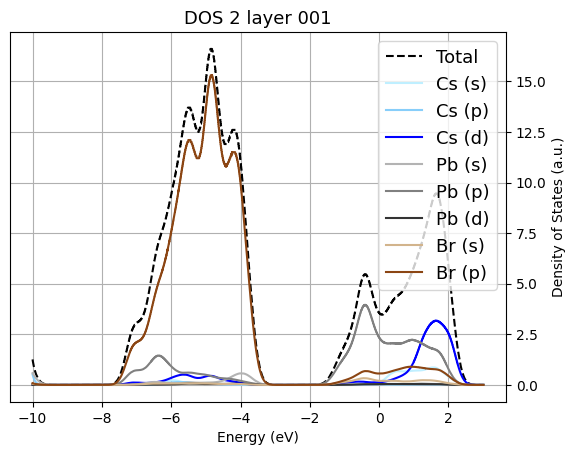

In [17]:
fig, ax_dos = plt.subplots(1,1)
ax_dos.set_title('DOS (a.u.)', fontsize = 13)
#ax_dos.set_xlim(0,3)
ax_dos.plot(E,DOS, color='0', linewidth=1.5,linestyle = '--', label='Total')
for i in range(8):
    ax_dos.plot(np.array(dos_objects[i]['E(eV)']), np.array(dos_objects[i]['pdos(E)']), label = dos_legends[i], c= DOS_colors[i])
    ax_dos.yaxis.set_label_position("right")
    ax_dos.legend(loc='upper right', fontsize = 13)
    ax_dos.grid('--')
    ax_dos.yaxis.tick_right()
fig.subplots_adjust(wspace=0.05)
ax_dos.set_title('DOS 2 layer 001', fontsize = 13)
ax_dos.set_xlabel('Energy (eV)')
ax_dos.set_ylabel('Density of States (a.u.)')
plt.savefig('CsPbBr3/001/1-4/DOS_001-1-4.png', dpi = 200)

## 001-1-8

In [18]:
bandas = readband(r'CsPbBr3/001/1-8/band-CsPbBr3-001-1-8.gnu')

In [19]:
dos = pd.read_csv(r'CsPbBr3/001/1-8/dos_CsPbBr3-001-1-8.txt', sep = ' ')
dos_cs_s = pd.read_csv(r'CsPbBr3/001/1-8/DOS-Cs-s.txt', sep = ' ')
dos_cs_p = pd.read_csv(r'CsPbBr3/001/1-8/DOS-Cs-p.txt', sep = ' ')
dos_cs_d = pd.read_csv(r'CsPbBr3/001/1-8/DOS-Cs-d.txt', sep = ' ')
dos_pb_s = pd.read_csv(r'CsPbBr3/001/1-8/DOS-Pb-s.txt', sep = ' ')
dos_pb_p = pd.read_csv(r'CsPbBr3/001/1-8/DOS-Pb-p.txt', sep = ' ')
dos_pb_d = pd.read_csv(r'CsPbBr3/001/1-8/DOS-Pb-d.txt', sep = ' ')
dos_br_s = pd.read_csv(r'CsPbBr3/001/1-8/DOS-Br-s.txt', sep = ' ')
dos_br_p = pd.read_csv(r'CsPbBr3/001/1-8/DOS-Br-p.txt', sep = ' ')
dos_objects = [dos_cs_s, dos_cs_p, dos_cs_d, dos_pb_s, dos_pb_p, dos_pb_d, dos_br_s, dos_br_p]
dos_legends = ['Cs (s)', 'Cs (p)', 'Cs (d)', 'Pb (s)', 'Pb (p)', 'Pb (d)', 'Br (s)', 'Br (p)']

In [20]:
DOS = dos['dos(E)']
E = dos['E(eV)']
indices = list(bandas['k'])
len(indices)

61

indice: 50
Band Gap = 1.762 eV


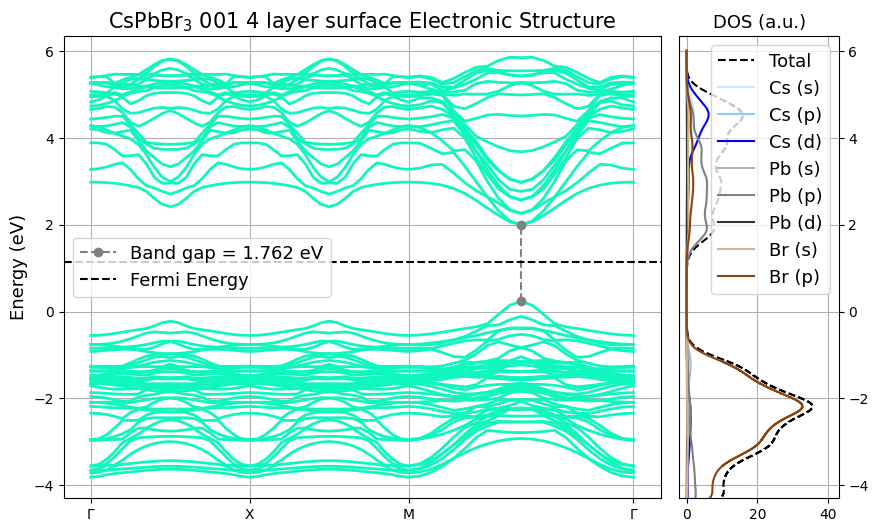

In [21]:
nbnd = len(bandas.keys())-1
k_nodes = [indices[0], indices[20], indices[40], indices[60]] 
#print(k_nodes)

fig, (ax, ax_dos) = plt.subplots(1, 2, figsize=(10, 6), gridspec_kw={'width_ratios': [3, 0.8]})

for i in range(53,nbnd):
#for i in range(0,nbnd):
    ax.plot(bandas['k'], bandas['e'+str(i)], c = '#0ff6be', linewidth = 2)
    
#ax.plot(bandas['k'], bandas['e59'], c = '0.7', linewidth = 1.5) #Valence band
#ax.plot(bandas['k'], bandas['e60'], c = '0.7', linewidth = 1.5) # conduction band

fermi = 1.1380

# Band Gap:
bg = min(np.array(bandas['e88'])- np.array(bandas['e87']))
print('indice:', list(np.array(bandas['e88'])- np.array(bandas['e87'])).index(bg))
x1, y1 = bandas['k'][50], bandas['e87'][50]
x2, y2 = bandas['k'][50], bandas['e88'][50]
ax.plot([x1, x2], [y1, y2], color='0.5', linestyle='--', marker='o', label=f'Band gap = {bg:.3f} eV')

print('Band Gap =', bg, 'eV')

ax.set_xticks(k_nodes)
ax.set_xticklabels(["$\Gamma$","X","M","$\Gamma$"])
ax.grid('--')
ax.set_title(r'CsPbBr$_3$ 001 4 layer surface Electronic Structure', fontsize = 15)
ax.axhline(fermi, linestyle = '--', color = '0', label = 'Fermi Energy')
ax.legend(loc = 'center left', fontsize = 13)
ax.set_ylabel('Energy (eV)', fontsize = 13)

#DOS
ax_dos.set_title('DOS (a.u.)', fontsize = 13)
#ax_dos.set_xlim(0,3)
ax_dos.plot(DOS, E, color='0', label='Total', linestyle = '--')
for i in range(8):
    ax_dos.plot(np.array(dos_objects[i]['pdos(E)']),np.array(dos_objects[i]['E(eV)']), label = dos_legends[i], c= DOS_colors[i])
    ax_dos.yaxis.set_label_position("right")
    ax_dos.legend(loc='upper right', fontsize = 13)
    ax_dos.grid('--')
    ax_dos.yaxis.tick_right()
fig.subplots_adjust(wspace=0.05) 
ax_dos.set_ylim(ax.get_ylim())  

plt.savefig(r'CsPbBr3/001/1-8/banda_CsPbBr3-001-1-8.png', dpi = 200)

#fig, ax_dos_001 = plt.subplots(1,1)
#ax_dos_001.set_title('DOS (a.u.)', fontsize = 13)
#ax_dos_001.set_xlim(0,3)
ax_dos_001.plot(E,DOS, color='0', linewidth=1.5,linestyle = '--', label='Total')
for i in range(8):
    ax_dos_001.plot(np.array(dos_objects[i]['E(eV)']), np.array(dos_objects[i]['pdos(E)']), label = dos_legends[i], c= DOS_colors[i])
    #ax_dos_001.yaxis.set_label_position("right")
    #ax_dos_001.legend(loc='upper right', fontsize = 13)
    ax_dos_001.grid('--')
    #ax_dos_001.yaxis.tick_right()
#fig.subplots_adjust(wspace=0.05)
ax_dos_001.axvline(fermi, linestyle = '--', c = 'r', linewidth=1.5, label = 'Fermi Energy')

#plt.savefig('CsPbBr3/001/1-8/DOS_001-1-8.png', dpi = 200)

## 001-1-10

In [22]:
bandas = readband(r'CsPbBr3/001/1-10/band-CsPbBr3-001-1-10.gnu')

In [23]:
dos = pd.read_csv(r'CsPbBr3/001/1-10/dos_CsPbBr3-001-1-10.txt', sep = ' ')
dos_cs_s = pd.read_csv(r'CsPbBr3/001/1-10/DOS-Cs-s.txt', sep = ' ')
dos_cs_p = pd.read_csv(r'CsPbBr3/001/1-10/DOS-Cs-p.txt', sep = ' ')
dos_cs_d = pd.read_csv(r'CsPbBr3/001/1-10/DOS-Cs-d.txt', sep = ' ')
dos_pb_s = pd.read_csv(r'CsPbBr3/001/1-10/DOS-Pb-s.txt', sep = ' ')
dos_pb_p = pd.read_csv(r'CsPbBr3/001/1-10/DOS-Pb-p.txt', sep = ' ')
dos_pb_d = pd.read_csv(r'CsPbBr3/001/1-10/DOS-Pb-d.txt', sep = ' ')
dos_br_s = pd.read_csv(r'CsPbBr3/001/1-10/DOS-Br-s.txt', sep = ' ')
dos_br_p = pd.read_csv(r'CsPbBr3/001/1-10/DOS-Br-p.txt', sep = ' ')
dos_objects = [dos_cs_s, dos_cs_p, dos_cs_d, dos_pb_s, dos_pb_p, dos_pb_d, dos_br_s, dos_br_p]
dos_legends = ['Cs (s)', 'Cs (p)', 'Cs (d)', 'Pb (s)', 'Pb (p)', 'Pb (d)', 'Br (s)', 'Br (p)']

In [24]:
DOS = dos['dos(E)']
E = dos['E(eV)']
indices = list(bandas['k'])
len(indices)

61

indice: 50
Band Gap = 1.623 eV


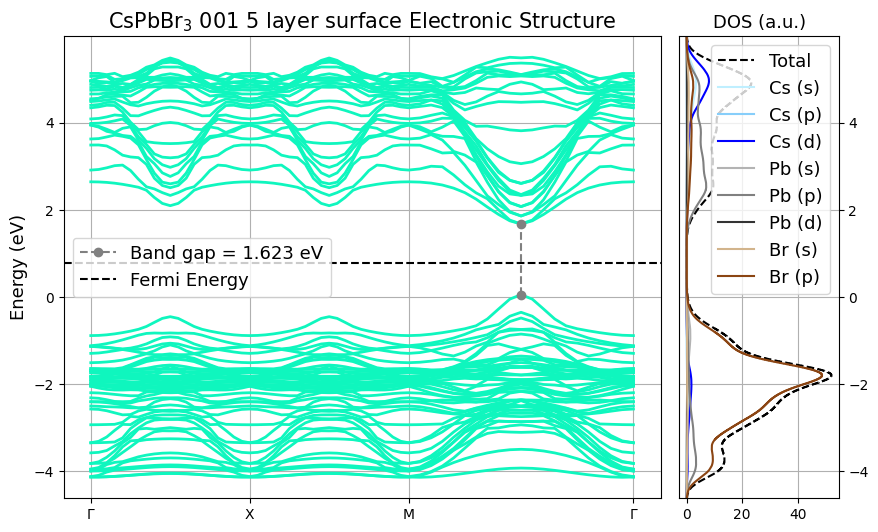

In [25]:
nbnd = len(bandas.keys())-1
k_nodes = [indices[0], indices[20], indices[40], indices[60]] 
#print(k_nodes)

fig, (ax, ax_dos) = plt.subplots(1, 2, figsize=(10, 6), gridspec_kw={'width_ratios': [3, 0.8]})

for i in range(65,nbnd):
#for i in range(0,nbnd):
    ax.plot(bandas['k'], bandas['e'+str(i)], c = '#0ff6be', linewidth = 2)
    
#ax.plot(bandas['k'], bandas['e109'], c = 'r', linewidth = 1.5) #Valence band
#ax.plot(bandas['k'], bandas['e110'], c = 'r', linewidth = 1.5) # conduction band

fermi = 0.7865

# Band Gap:
bg = min(np.array(bandas['e110'])- np.array(bandas['e109']))
print('indice:', list(np.array(bandas['e110'])- np.array(bandas['e109'])).index(bg))
x1, y1 = bandas['k'][50], bandas['e109'][50]
x2, y2 = bandas['k'][50], bandas['e110'][50]
ax.plot([x1, x2], [y1, y2], color='0.5', linestyle='--', marker='o', label=f'Band gap = {bg:.3f} eV')

print('Band Gap =', bg, 'eV')

ax.set_xticks(k_nodes)
ax.set_xticklabels(["$\Gamma$","X","M","$\Gamma$"])
ax.grid('--')
ax.set_title(r'CsPbBr$_3$ 001 5 layer surface Electronic Structure', fontsize = 15)
ax.axhline(fermi, linestyle = '--', color = '0', label = 'Fermi Energy')
ax.legend(loc = 'center left', fontsize = 13)
ax.set_ylabel('Energy (eV)', fontsize = 13)

#DOS
ax_dos.set_title('DOS (a.u.)', fontsize = 13)
#ax_dos.set_xlim(0,3)
ax_dos.plot(DOS, E, color='0', label='Total', linestyle = '--')
for i in range(8):
    ax_dos.plot(np.array(dos_objects[i]['pdos(E)']),np.array(dos_objects[i]['E(eV)']), label = dos_legends[i], c= DOS_colors[i])
    ax_dos.yaxis.set_label_position("right")
    ax_dos.legend(loc='upper right', fontsize = 13)
    ax_dos.grid('--')
    ax_dos.yaxis.tick_right()
fig.subplots_adjust(wspace=0.05) 
ax_dos.set_ylim(ax.get_ylim())  

plt.savefig(r'CsPbBr3/001/1-10/banda_CsPbBr3-001-1-10.png', dpi = 200)

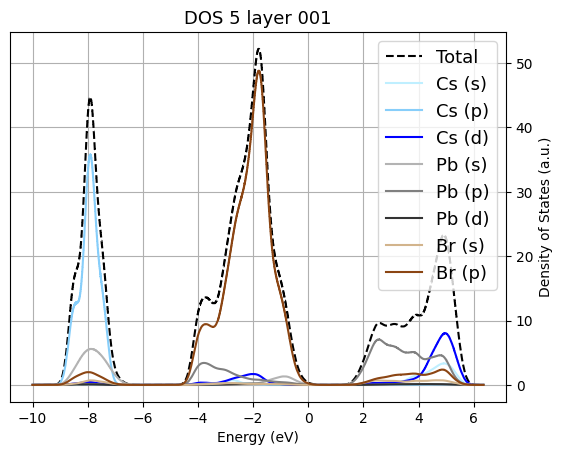

In [26]:
fig, ax_dos = plt.subplots(1,1)
ax_dos.set_title('DOS (a.u.)', fontsize = 13)
#ax_dos.set_xlim(0,3)
ax_dos.plot(E,DOS, color='0', linewidth=1.5,linestyle = '--', label='Total')
for i in range(8):
    ax_dos.plot(np.array(dos_objects[i]['E(eV)']), np.array(dos_objects[i]['pdos(E)']), label = dos_legends[i], c= DOS_colors[i])
    ax_dos.yaxis.set_label_position("right")
    ax_dos.legend(loc='upper right', fontsize = 13)
    ax_dos.grid('--')
    ax_dos.yaxis.tick_right()
fig.subplots_adjust(wspace=0.05)
ax_dos.set_title('DOS 5 layer 001', fontsize = 13)
ax_dos.set_xlabel('Energy (eV)')
ax_dos.set_ylabel('Density of States (a.u.)')
plt.savefig('CsPbBr3/001/1-10/DOS_001-1-10.png', dpi = 200)

## 110-1-2

In [27]:
bandas = readband(r'CsPbBr3/110/1-2/band-CsPbBr3-110-1-2.gnu')

In [28]:
dos = pd.read_csv(r'CsPbBr3/110/1-2/dos_CsPbBr3-110-1-2.txt', sep = ' ')
dos_cs_s = pd.read_csv(r'CsPbBr3/110/1-2/DOS-Cs-s.txt', sep = ' ')
dos_cs_p = pd.read_csv(r'CsPbBr3/110/1-2/DOS-Cs-p.txt', sep = ' ')
dos_cs_d = pd.read_csv(r'CsPbBr3/110/1-2/DOS-Cs-d.txt', sep = ' ')
dos_pb_s = pd.read_csv(r'CsPbBr3/110/1-2/DOS-Pb-s.txt', sep = ' ')
dos_pb_p = pd.read_csv(r'CsPbBr3/110/1-2/DOS-Pb-p.txt', sep = ' ')
dos_pb_d = pd.read_csv(r'CsPbBr3/110/1-2/DOS-Pb-d.txt', sep = ' ')
dos_br_s = pd.read_csv(r'CsPbBr3/110/1-2/DOS-Br-s.txt', sep = ' ')
dos_br_p = pd.read_csv(r'CsPbBr3/110/1-2/DOS-Br-p.txt', sep = ' ')
dos_objects = [dos_cs_s, dos_cs_p, dos_cs_d, dos_pb_s, dos_pb_p, dos_pb_d, dos_br_s, dos_br_p]
dos_legends = ['Cs (s)', 'Cs (p)', 'Cs (d)', 'Pb (s)', 'Pb (p)', 'Pb (d)', 'Br (s)', 'Br (p)']

In [29]:
DOS = dos['dos(E)']
E = dos['E(eV)']
indices = list(bandas['k'])
len(indices)

61

indice: 50
Band Gap = 2.9767 eV


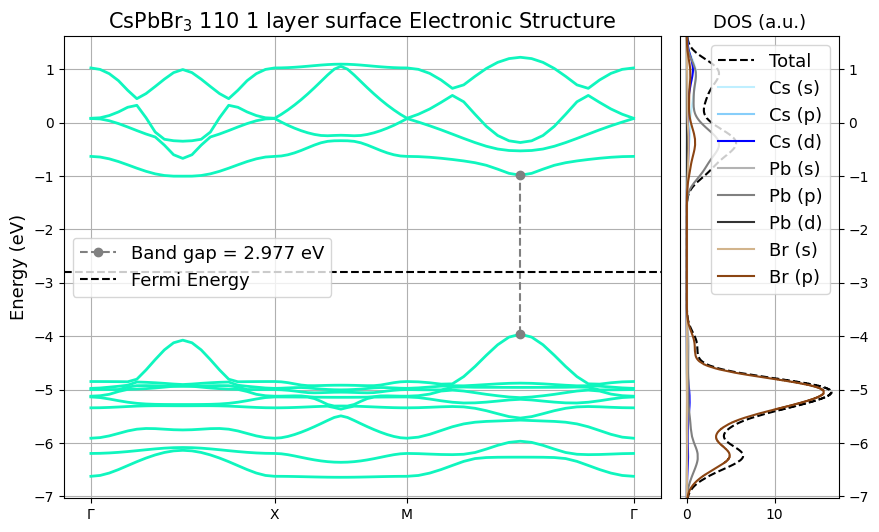

In [30]:
nbnd = len(bandas.keys())-1
k_nodes = [indices[0], indices[20], indices[40], indices[60]] 

fig, (ax, ax_dos) = plt.subplots(1, 2, figsize=(10, 6), gridspec_kw={'width_ratios': [3, 0.8]})

for i in range(13,nbnd):
#for i in range(0,nbnd):
    ax.plot(bandas['k'], bandas['e'+str(i)], c = '#0ff6be', linewidth = 2)
    
#ax.plot(bandas['k'], bandas['e21'], c = '0.7', linewidth = 1.5) #Valence band
#ax.plot(bandas['k'], bandas['e22'], c = '0.7', linewidth = 1.5) # conduction band
fermi =-2.7907
# Band Gap:
bg = min(np.array(bandas['e22'])- np.array(bandas['e21']))
print('indice:', list(np.array(bandas['e22'])- np.array(bandas['e21'])).index(bg))
x1, y1 = bandas['k'][50], bandas['e21'][50]
x2, y2 = bandas['k'][50], bandas['e22'][50]
ax.plot([x1, x2], [y1, y2], color='0.5', linestyle='--', marker='o', label=f'Band gap = {bg:.3f} eV')

print('Band Gap =', bg, 'eV')


ax.set_xticks(k_nodes)
ax.set_xticklabels(["$\Gamma$","X","M","$\Gamma$"])
ax.grid('--')
ax.set_title(r'CsPbBr$_3$ 110 1 layer surface Electronic Structure', fontsize = 15)
ax.axhline(fermi, linestyle = '--', color = '0', label = 'Fermi Energy')
ax.legend(loc = 'center left', fontsize = 13)
ax.set_ylabel('Energy (eV)', fontsize = 13)


#DOS
ax_dos.set_title('DOS (a.u.)', fontsize = 13)
#ax_dos.set_xlim(0,3)
ax_dos.plot(DOS, E, color='0', label='Total', linestyle = '--')
for i in range(8):
    ax_dos.plot(np.array(dos_objects[i]['pdos(E)']) ,np.array(dos_objects[i]['E(eV)']), label = dos_legends[i], c= DOS_colors[i])
    ax_dos.yaxis.set_label_position("right")
    ax_dos.legend(loc='upper right', fontsize = 13)
    ax_dos.grid('--')
    ax_dos.yaxis.tick_right()
fig.subplots_adjust(wspace=0.05) 
ax_dos.set_ylim(ax.get_ylim())  

plt.savefig(r'CsPbBr3/110/1-2/banda_CsPbBr3-110-1-2.png', dpi = 200)

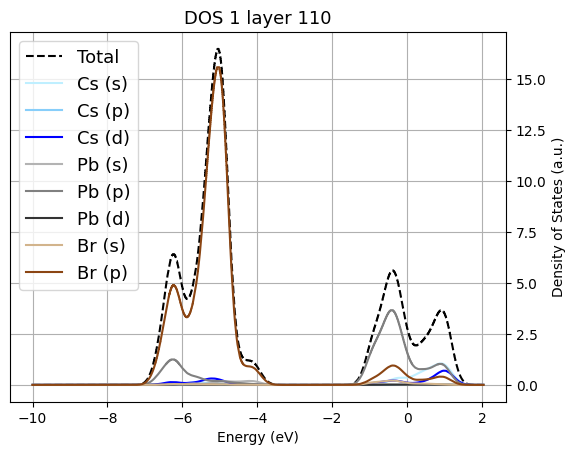

In [31]:
fig, ax_dos = plt.subplots(1,1)
ax_dos.set_title('DOS (a.u.)', fontsize = 13)
#ax_dos.set_xlim(0,3)
ax_dos.plot(E,DOS, color='0', linewidth=1.5,linestyle = '--', label='Total')
for i in range(8):
    ax_dos.plot(np.array(dos_objects[i]['E(eV)']), np.array(dos_objects[i]['pdos(E)']), label = dos_legends[i], c= DOS_colors[i])
    ax_dos.yaxis.set_label_position("right")
    ax_dos.legend(loc='upper left', fontsize = 13)
    ax_dos.grid('--')
    ax_dos.yaxis.tick_right()
fig.subplots_adjust(wspace=0.05)
ax_dos.set_title('DOS 1 layer 110', fontsize = 13)
ax_dos.set_xlabel('Energy (eV)')
ax_dos.set_ylabel('Density of States (a.u.)')
plt.savefig('CsPbBr3/110/1-2/DOS_110-1-2.png', dpi = 200)

## 110-1-4

In [32]:
bandas = readband(r'CsPbBr3/110/1-4/band-CsPbBr3-110-1-4.gnu')

In [33]:
dos = pd.read_csv(r'CsPbBr3/110/1-4/dos_CsPbBr3-110-1-4.txt', sep = ' ')
dos_cs_s = pd.read_csv(r'CsPbBr3/110/1-4/DOS-Cs-s.txt', sep = ' ')
dos_cs_p = pd.read_csv(r'CsPbBr3/110/1-4/DOS-Cs-p.txt', sep = ' ')
dos_cs_d = pd.read_csv(r'CsPbBr3/110/1-4/DOS-Cs-d.txt', sep = ' ')
dos_pb_s = pd.read_csv(r'CsPbBr3/110/1-4/DOS-Pb-s.txt', sep = ' ')
dos_pb_p = pd.read_csv(r'CsPbBr3/110/1-4/DOS-Pb-p.txt', sep = ' ')
dos_pb_d = pd.read_csv(r'CsPbBr3/110/1-4/DOS-Pb-d.txt', sep = ' ')
dos_br_s = pd.read_csv(r'CsPbBr3/110/1-4/DOS-Br-s.txt', sep = ' ')
dos_br_p = pd.read_csv(r'CsPbBr3/110/1-4/DOS-Br-p.txt', sep = ' ')
dos_objects = [dos_cs_s, dos_cs_p, dos_cs_d, dos_pb_s, dos_pb_p, dos_pb_d, dos_br_s, dos_br_p]
dos_legends = ['Cs (s)', 'Cs (p)', 'Cs (d)', 'Pb (s)', 'Pb (p)', 'Pb (d)', 'Br (s)', 'Br (p)']

In [34]:
DOS = dos['dos(E)']
E = dos['E(eV)']
indices = list(bandas['k'])
len(indices)

61

indice: 50
Band Gap = 1.7815000000000003 eV


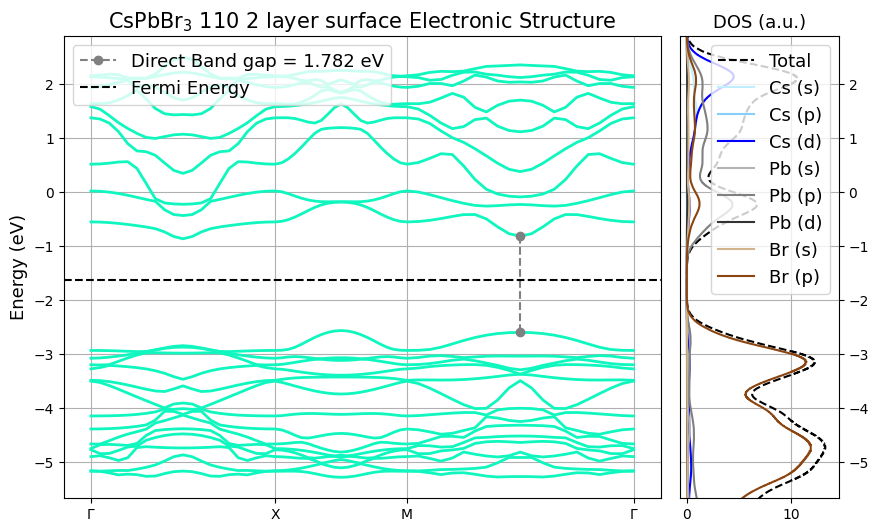

In [35]:
nbnd = len(bandas.keys())-1
k_nodes = [indices[0], indices[20], indices[40], indices[60]] 

fig, (ax, ax_dos) = plt.subplots(1, 2, figsize=(10, 6), gridspec_kw={'width_ratios': [3, 0.8]})

for i in range(30,nbnd):
#for i in range(0,nbnd):
    ax.plot(bandas['k'], bandas['e'+str(i)], c = '#0ff6be', linewidth = 2)
    
#ax.plot(bandas['k'], bandas['e43'], c = '0.7', linewidth = 1.5) #Valence band
#ax.plot(bandas['k'], bandas['e44'], c = '0.7', linewidth = 1.5) # conduction band
fermi =-1.6264
# Band Gap:
bg = min(np.array(bandas['e44'])- np.array(bandas['e43']))
print('indice:', list(np.array(bandas['e44'])- np.array(bandas['e43'])).index(bg))
x1, y1 = bandas['k'][50], bandas['e43'][50]
x2, y2 = bandas['k'][50], bandas['e44'][50]
ax.plot([x1, x2], [y1, y2], color='0.5', linestyle='--', marker='o', label=f'Direct Band gap = {bg:.3f} eV')

print('Band Gap =', bg, 'eV')


ax.set_xticks(k_nodes)
ax.set_xticklabels(["$\Gamma$","X","M","$\Gamma$"])
ax.grid('--')
ax.set_title(r'CsPbBr$_3$ 110 2 layer surface Electronic Structure', fontsize = 15)
ax.axhline(fermi, linestyle = '--', color = '0', label = 'Fermi Energy')
ax.legend(loc = 'upper left', fontsize = 13)
ax.set_ylabel('Energy (eV)', fontsize = 13)


#DOS
ax_dos.set_title('DOS (a.u.)', fontsize = 13)
#ax_dos.set_xlim(0,3)
ax_dos.plot(DOS, E, color='0', label='Total', linestyle = '--')
for i in range(8):
    ax_dos.plot(np.array(dos_objects[i]['pdos(E)']) ,np.array(dos_objects[i]['E(eV)']), label = dos_legends[i], c= DOS_colors[i])
    ax_dos.yaxis.set_label_position("right")
    ax_dos.legend(loc='upper right', fontsize = 13)
    ax_dos.grid('--')
    ax_dos.yaxis.tick_right()
fig.subplots_adjust(wspace=0.05) 
ax_dos.set_ylim(ax.get_ylim())  

plt.savefig(r'CsPbBr3/110/1-4/banda_CsPbBr3-110-1-4.png', dpi = 200)

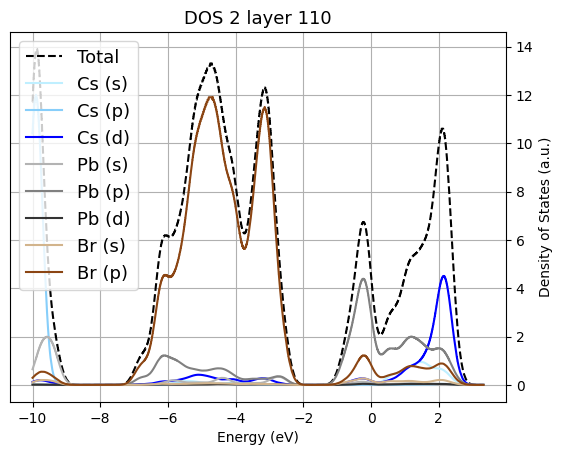

In [36]:
fig, ax_dos = plt.subplots(1,1)
#ax_dos.set_xlim(0,3)
ax_dos.plot(E,DOS, color='0', linewidth=1.5,linestyle = '--', label='Total')
for i in range(8):
    ax_dos.plot(np.array(dos_objects[i]['E(eV)']), np.array(dos_objects[i]['pdos(E)']), label = dos_legends[i], c= DOS_colors[i])
    ax_dos.yaxis.set_label_position("right")
    ax_dos.legend(loc='upper left', fontsize = 13)
    ax_dos.grid('--')
    ax_dos.yaxis.tick_right()
fig.subplots_adjust(wspace=0.05)
ax_dos.set_title('DOS 2 layer 110', fontsize = 13)
ax_dos.set_xlabel('Energy (eV)')
ax_dos.set_ylabel('Density of States (a.u.)')
plt.savefig('CsPbBr3/110/1-4/DOS_110-1-4.png', dpi = 200)

## 110-1-8

In [37]:
bandas = readband(r'CsPbBr3/110/1-8/band-CsPbBr3-110-1-8.gnu')

In [38]:
dos = pd.read_csv(r'CsPbBr3/110/1-8/dos_CsPbBr3-110-1-8.txt', sep = ' ')
dos_cs_s = pd.read_csv(r'CsPbBr3/110/1-8/DOS-Cs-s.txt', sep = ' ')
dos_cs_p = pd.read_csv(r'CsPbBr3/110/1-8/DOS-Cs-p.txt', sep = ' ')
dos_cs_d = pd.read_csv(r'CsPbBr3/110/1-8/DOS-Cs-d.txt', sep = ' ')
dos_pb_s = pd.read_csv(r'CsPbBr3/110/1-8/DOS-Pb-s.txt', sep = ' ')
dos_pb_p = pd.read_csv(r'CsPbBr3/110/1-8/DOS-Pb-p.txt', sep = ' ')
dos_pb_d = pd.read_csv(r'CsPbBr3/110/1-8/DOS-Pb-d.txt', sep = ' ')
dos_br_s = pd.read_csv(r'CsPbBr3/110/1-8/DOS-Br-s.txt', sep = ' ')
dos_br_p = pd.read_csv(r'CsPbBr3/110/1-8/DOS-Br-p.txt', sep = ' ')
dos_objects = [dos_cs_s, dos_cs_p, dos_cs_d, dos_pb_s, dos_pb_p, dos_pb_d, dos_br_s, dos_br_p]
dos_legends = ['Cs (s)', 'Cs (p)', 'Cs (d)', 'Pb (s)', 'Pb (p)', 'Pb (d)', 'Br (s)', 'Br (p)']

In [39]:
DOS = dos['dos(E)']
E = dos['E(eV)']
indices = list(bandas['k'])
len(indices)

61

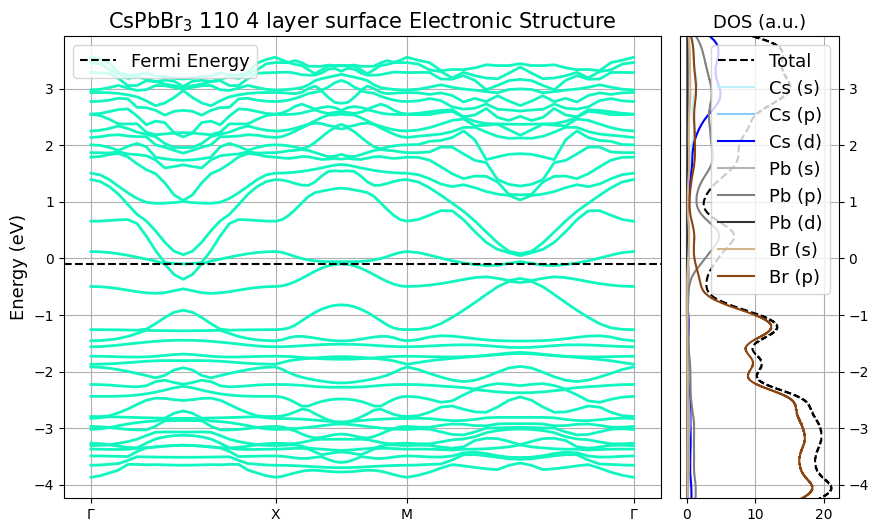

In [40]:
nbnd = len(bandas.keys())-1
k_nodes = [indices[0], indices[20], indices[40], indices[60]] 

fig, (ax, ax_dos) = plt.subplots(1, 2, figsize=(10, 6), gridspec_kw={'width_ratios': [3, 0.8]})

for i in range(70,nbnd):
#for i in range(0,nbnd):
    ax.plot(bandas['k'], bandas['e'+str(i)], c = '#0ff6be', linewidth = 2)
    
#ax.plot(bandas['k'], bandas['e88'], c = '0.7', linewidth = 1.5) #Valence band
#ax.plot(bandas['k'], bandas['e89'], c = '0.7', linewidth = 1.5) # conduction band
# Band Gap:
fermi =-0.1061

#print('Band Gap =', bg, 'eV')

ax.set_xticks(k_nodes)
ax.set_xticklabels(["$\Gamma$","X","M","$\Gamma$"])
ax.grid('--')
ax.set_title(r'CsPbBr$_3$ 110 4 layer surface Electronic Structure', fontsize = 15)
ax.axhline(fermi, linestyle = '--', color = '0', label = 'Fermi Energy')
ax.legend(loc = 'upper left', fontsize = 13)
ax.set_ylabel('Energy (eV)', fontsize = 13)


#DOS
ax_dos.set_title('DOS (a.u.)', fontsize = 13)
#ax_dos.set_xlim(0,3)
ax_dos.plot(DOS, E, color='0', label='Total', linestyle = '--')
for i in range(8):
    ax_dos.plot(np.array(dos_objects[i]['pdos(E)']),np.array(dos_objects[i]['E(eV)']), label = dos_legends[i], c= DOS_colors[i])
    ax_dos.yaxis.set_label_position("right")
    ax_dos.legend(loc='upper right', fontsize = 13)
    ax_dos.grid('--')
    ax_dos.yaxis.tick_right()
fig.subplots_adjust(wspace=0.05) 
ax_dos.set_ylim(ax.get_ylim())  

plt.savefig(r'CsPbBr3/110/1-8/banda_CsPbBr3-110-1-8.png', dpi = 200)

#fig, ax_dos_011 = plt.subplots(1,1)
#ax_dos_011.set_xlim(0,3)
ax_dos_011.plot(E,DOS, color='0', linewidth=1.5,linestyle = '--', label='Total')
for i in range(8):
    ax_dos_011.plot(np.array(dos_objects[i]['E(eV)']), np.array(dos_objects[i]['pdos(E)']), label = dos_legends[i], c= DOS_colors[i])
    #ax_dos_011.yaxis.set_label_position("right")
    #ax_dos_011.legend(loc='upper right', fontsize = 13)
    ax_dos_011.grid('--')
    #ax_dos_011.yaxis.tick_right()
fig.subplots_adjust(wspace=0.05)

ax_dos_011.axvline(fermi, linestyle = '--', c = 'r', linewidth=1.5, label = 'Fermi Energy')


#plt.savefig('CsPbBr3/110/1-8/DOS_110-1-8.png', dpi = 200)

## 110-1-10

In [41]:
bandas = readband(r'CsPbBr3/110/1-10/band-CsPbBr3-110-1-10.gnu')

In [42]:
dos = pd.read_csv(r'CsPbBr3/110/1-10/dos_CsPbBr3-110-1-10.txt', sep = ' ')
dos_cs_s = pd.read_csv(r'CsPbBr3/110/1-10/DOS-Cs-s.txt', sep = ' ')
dos_cs_p = pd.read_csv(r'CsPbBr3/110/1-10/DOS-Cs-p.txt', sep = ' ')
dos_cs_d = pd.read_csv(r'CsPbBr3/110/1-10/DOS-Cs-d.txt', sep = ' ')
dos_pb_s = pd.read_csv(r'CsPbBr3/110/1-10/DOS-Pb-s.txt', sep = ' ')
dos_pb_p = pd.read_csv(r'CsPbBr3/110/1-10/DOS-Pb-p.txt', sep = ' ')
dos_pb_d = pd.read_csv(r'CsPbBr3/110/1-10/DOS-Pb-d.txt', sep = ' ')
dos_br_s = pd.read_csv(r'CsPbBr3/110/1-10/DOS-Br-s.txt', sep = ' ')
dos_br_p = pd.read_csv(r'CsPbBr3/110/1-10/DOS-Br-p.txt', sep = ' ')
dos_objects = [dos_cs_s, dos_cs_p, dos_cs_d, dos_pb_s, dos_pb_p, dos_pb_d, dos_br_s, dos_br_p]
dos_legends = ['Cs (s)', 'Cs (p)', 'Cs (d)', 'Pb (s)', 'Pb (p)', 'Pb (d)', 'Br (s)', 'Br (p)']

In [43]:
DOS = dos['dos(E)']
E = dos['E(eV)']
indices = list(bandas['k'])
len(indices)

61

indice: 49
Band Gap = 0.04579999999999998 eV


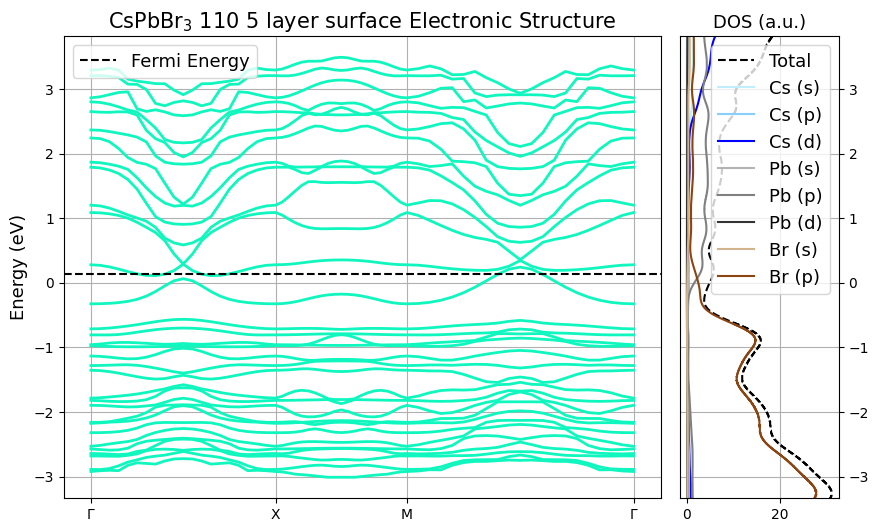

In [44]:
nbnd = len(bandas.keys())-1
k_nodes = [indices[0], indices[20], indices[40], indices[60]] 
#print(k_nodes)

fig, (ax, ax_dos) = plt.subplots(1, 2, figsize=(10, 6), gridspec_kw={'width_ratios': [3, 0.8]})

for i in range(90,nbnd-10):
#for i in range(0,nbnd):
    ax.plot(bandas['k'], bandas['e'+str(i)], c = '#0ff6be', linewidth = 2)
    
#ax.plot(bandas['k'], bandas['e109'], c = 'r', linewidth = 1.5) #Valence band
#ax.plot(bandas['k'], bandas['e110'], c = 'r', linewidth = 1.5) # conduction band

fermi = 0.1335

# Band Gap:
bg = min(np.array(bandas['e110'])- np.array(bandas['e109']))
print('indice:', list(np.array(bandas['e110'])- np.array(bandas['e109'])).index(bg))
x1, y1 = bandas['k'][49], bandas['e109'][49]
x2, y2 = bandas['k'][49], bandas['e110'][49]
#ax.plot([x1, x2], [y1, y2], color='0.5', linestyle='--', marker='o', label='Band gap = 1.762 eV')

print('Band Gap =', bg, 'eV')

ax.set_xticks(k_nodes)
ax.set_xticklabels(["$\Gamma$","X","M","$\Gamma$"])
ax.grid('--')
ax.set_title(r'CsPbBr$_3$ 110 5 layer surface Electronic Structure', fontsize = 15)
ax.axhline(fermi , linestyle = '--', color = '0', label = 'Fermi Energy')
ax.legend(loc = 'upper left', fontsize = 13)
ax.set_ylabel('Energy (eV)', fontsize = 13)

#DOS
ax_dos.set_title('DOS (a.u.)', fontsize = 13)
#ax_dos.set_xlim(0,3)
ax_dos.plot(DOS, E, color='0', label='Total', linestyle = '--')
for i in range(8):
    ax_dos.plot(np.array(dos_objects[i]['pdos(E)']),np.array(dos_objects[i]['E(eV)']), label = dos_legends[i], c= DOS_colors[i])
    ax_dos.yaxis.set_label_position("right")
    ax_dos.legend(loc='upper right', fontsize = 13)
    ax_dos.grid('--')
    ax_dos.yaxis.tick_right()
fig.subplots_adjust(wspace=0.05) 
ax_dos.set_ylim(ax.get_ylim())  

plt.savefig(r'CsPbBr3/110/1-10/banda_CsPbBr3-110-1-10.png', dpi = 200)

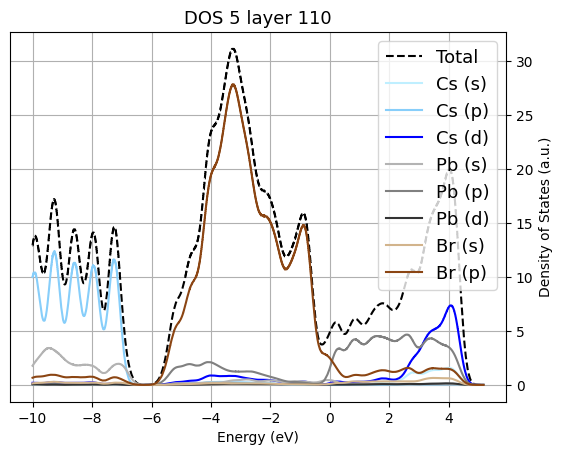

In [45]:
fig, ax_dos = plt.subplots(1,1)
ax_dos.set_title('DOS (a.u.)', fontsize = 13)
#ax_dos.set_xlim(0,3)
ax_dos.plot(E,DOS, color='0', linewidth=1.5,linestyle = '--', label='Total')
for i in range(8):
    ax_dos.plot(np.array(dos_objects[i]['E(eV)']), np.array(dos_objects[i]['pdos(E)']), label = dos_legends[i], c= DOS_colors[i])
    ax_dos.yaxis.set_label_position("right")
    ax_dos.legend(loc='upper right', fontsize = 13)
    ax_dos.grid('--')
    ax_dos.yaxis.tick_right()
fig.subplots_adjust(wspace=0.05)
ax_dos.set_title('DOS 5 layer 110', fontsize = 13)
ax_dos.set_xlabel('Energy (eV)')
ax_dos.set_ylabel('Density of States (a.u.)')
plt.savefig('CsPbBr3/110/1-10/DOS_110-1-10.png', dpi = 200)

## 111-1-2

In [46]:
bandas = readband(r'CsPbBr3/111/1-2/band-CsPbBr3-111-1-2.gnu')

In [47]:
dos = pd.read_csv(r'CsPbBr3/111/1-2/dos_CsPbBr3-111-1-2.txt', sep = ' ')
dos_cs_s = pd.read_csv(r'CsPbBr3/111/1-2/DOS-Cs-s.txt', sep = ' ')
dos_cs_p = pd.read_csv(r'CsPbBr3/111/1-2/DOS-Cs-p.txt', sep = ' ')
dos_cs_d = pd.read_csv(r'CsPbBr3/111/1-2/DOS-Cs-d.txt', sep = ' ')
dos_pb_s = pd.read_csv(r'CsPbBr3/111/1-2/DOS-Pb-s.txt', sep = ' ')
dos_pb_p = pd.read_csv(r'CsPbBr3/111/1-2/DOS-Pb-p.txt', sep = ' ')
dos_pb_d = pd.read_csv(r'CsPbBr3/111/1-2/DOS-Pb-d.txt', sep = ' ')
dos_br_s = pd.read_csv(r'CsPbBr3/111/1-2/DOS-Br-s.txt', sep = ' ')
dos_br_p = pd.read_csv(r'CsPbBr3/111/1-2/DOS-Br-p.txt', sep = ' ')
dos_objects = [dos_cs_s, dos_cs_p, dos_cs_d, dos_pb_s, dos_pb_p, dos_pb_d, dos_br_s, dos_br_p]
dos_legends = ['Cs (s)', 'Cs (p)', 'Cs (d)', 'Pb (s)', 'Pb (p)', 'Pb (d)', 'Br (s)', 'Br (p)']

In [48]:
DOS = dos['dos(E)']
E = dos['E(eV)']
indices = list(bandas['k'])
len(indices)

61

indice: 0
Direct Band Gap = 3.9023999999999996 eV


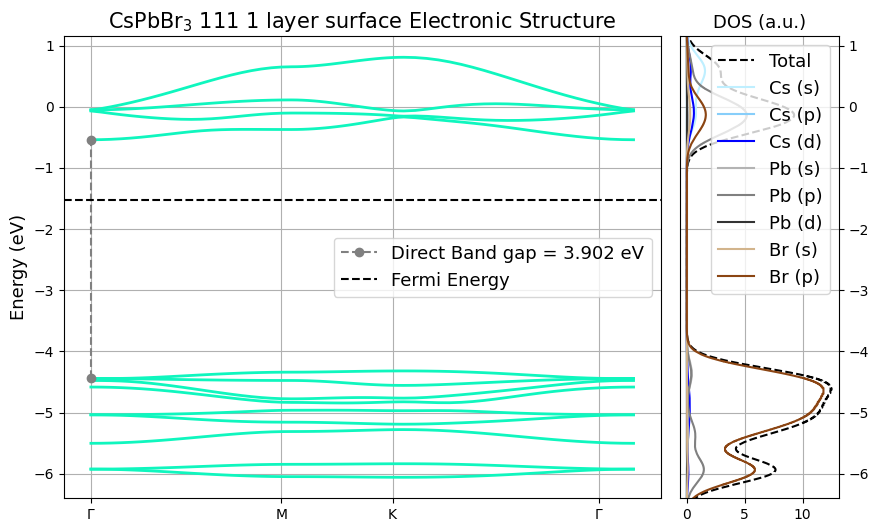

In [49]:
nbnd = len(bandas.keys())-1
k_nodes = [indices[0], indices[19], indices[38], indices[57]] 

fig, (ax, ax_dos) = plt.subplots(1, 2, figsize=(10, 6), gridspec_kw={'width_ratios': [3, 0.8]})

for i in range(13,nbnd):
#for i in range(0,nbnd):    
    ax.plot(bandas['k'], bandas['e'+str(i)], c = '#0ff6be', linewidth = 2)
    
#ax.plot(bandas['k'], bandas['e21'], c = '0.7', linewidth = 1.5) #Valence band
#ax.plot(bandas['k'], bandas['e22'], c = '0.7', linewidth = 1.5) # conduction band

fermi = -1.5293
# Band Gap:

bg = min(np.array(bandas['e22'])- np.array(bandas['e21']))
print('indice:', list(np.array(bandas['e22'])- np.array(bandas['e21'])).index(bg))
print('Direct Band Gap =', bg, 'eV')
x1, y1 = bandas['k'][0], bandas['e21'][0]
x2, y2 = bandas['k'][0], bandas['e22'][0]
ax.plot([x1, x2], [y1, y2], color='0.5', linestyle='--', marker='o', label=f'Direct Band gap = {bg:.3f} eV')

#plot:
ax.set_xticks(k_nodes)
ax.set_xticklabels(["$\Gamma$","M", "K", "$\Gamma$"])
ax.grid('--')
ax.set_title(r'CsPbBr$_3$ 111 1 layer surface Electronic Structure', fontsize = 15)
ax.axhline(fermi, linestyle = '--', color = '0', label = 'Fermi Energy')
ax.legend(loc = 'center right', fontsize = 13)
ax.set_ylabel('Energy (eV)', fontsize = 13)


#DOS
ax_dos.set_title('DOS (a.u.)', fontsize = 13)
#ax_dos.set_xlim(0,3)
ax_dos.plot(DOS, E, color='0', label='Total', linestyle = '--')
for i in range(8):
    ax_dos.plot(np.array(dos_objects[i]['pdos(E)']),np.array(dos_objects[i]['E(eV)']), label = dos_legends[i], c= DOS_colors[i])
    ax_dos.yaxis.set_label_position("right")
    ax_dos.legend(loc='upper right', fontsize = 13)
    ax_dos.grid('--')
    ax_dos.yaxis.tick_right()
fig.subplots_adjust(wspace=0.05) 
ax_dos.set_ylim(ax.get_ylim())  

plt.savefig(r'CsPbBr3/111/1-2/banda_CsPbBr3-111-1-2.png', dpi = 200)

fig, ax_dos = plt.subplots(1,1)
#ax_dos.set_xlim(0,3)
ax_dos.plot(E,DOS, color='0', linewidth=1.5,linestyle = '--', label='Total')
for i in range(8):
    ax_dos.plot(np.array(dos_objects[i]['E(eV)']), np.array(dos_objects[i]['pdos(E)']), label = dos_legends[i], c= DOS_colors[i])
    ax_dos.yaxis.set_label_position("right")
    ax_dos.legend(loc='upper left', fontsize = 13)
    ax_dos.grid('--')
    ax_dos.yaxis.tick_right()
fig.subplots_adjust(wspace=0.05)
ax_dos.set_title('DOS 1 layer 111', fontsize = 13)
ax_dos.set_xlabel('Energy (eV)')
ax_dos.set_ylabel('Density of States (a.u.)')
plt.savefig('CsPbBr3/111/1-2/DOS_111-1-2.png', dpi = 200)

## 111-1-4

In [50]:
bandas = readband(r'CsPbBr3/111/1-4/band-CsPbBr3-111-1-4.gnu')

In [51]:
dos = pd.read_csv(r'CsPbBr3/111/1-4/dos_CsPbBr3-111-1-4.txt', sep = ' ')
dos_cs_s = pd.read_csv(r'CsPbBr3/111/1-4/DOS-Cs-s.txt', sep = ' ')
dos_cs_p = pd.read_csv(r'CsPbBr3/111/1-4/DOS-Cs-p.txt', sep = ' ')
dos_cs_d = pd.read_csv(r'CsPbBr3/111/1-4/DOS-Cs-d.txt', sep = ' ')
dos_pb_s = pd.read_csv(r'CsPbBr3/111/1-4/DOS-Pb-s.txt', sep = ' ')
dos_pb_p = pd.read_csv(r'CsPbBr3/111/1-4/DOS-Pb-p.txt', sep = ' ')
dos_pb_d = pd.read_csv(r'CsPbBr3/111/1-4/DOS-Pb-d.txt', sep = ' ')
dos_br_s = pd.read_csv(r'CsPbBr3/111/1-4/DOS-Br-s.txt', sep = ' ')
dos_br_p = pd.read_csv(r'CsPbBr3/111/1-4/DOS-Br-p.txt', sep = ' ')
dos_objects = [dos_cs_s, dos_cs_p, dos_cs_d, dos_pb_s, dos_pb_p, dos_pb_d, dos_br_s, dos_br_p]
dos_legends = ['Cs (s)', 'Cs (p)', 'Cs (d)', 'Pb (s)', 'Pb (p)', 'Pb (d)', 'Br (s)', 'Br (p)']

In [52]:
DOS = dos['dos(E)']
E = dos['E(eV)']
indices = list(bandas['k'])
len(indices)

61

indice: 1
Direct Band Gap = 2.8342 eV


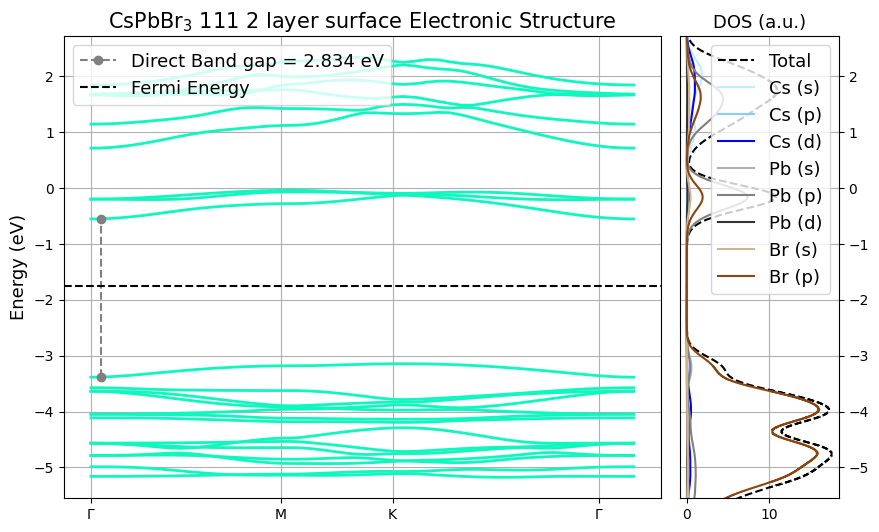

In [53]:
nbnd = len(bandas.keys())-1
k_nodes = [indices[0], indices[19], indices[38], indices[57]] 

fig, (ax, ax_dos) = plt.subplots(1, 2, figsize=(10, 6), gridspec_kw={'width_ratios': [3, 0.8]})

for i in range(30,nbnd):
#for i in range(0,nbnd):    
    ax.plot(bandas['k'], bandas['e'+str(i)], c = '#0ff6be', linewidth = 2)
    
#ax.plot(bandas['k'], bandas['e43'], c = '0.7', linewidth = 1.5) #Valence band
#ax.plot(bandas['k'], bandas['e44'], c = '0.7', linewidth = 1.5) # conduction band

fermi =-1.7545
# Band Gap:

bg = min(np.array(bandas['e44'])- np.array(bandas['e43']))
print('indice:', list(np.array(bandas['e44'])- np.array(bandas['e43'])).index(bg))
print('Direct Band Gap =', bg, 'eV')
x1, y1 = bandas['k'][1], bandas['e43'][1]
x2, y2 = bandas['k'][1], bandas['e44'][1]
ax.plot([x1, x2], [y1, y2], color='0.5', linestyle='--', marker='o', label=f'Direct Band gap = {bg:.3f} eV')

#plot:
ax.set_xticks(k_nodes)
ax.set_xticklabels(["$\Gamma$","M", "K", "$\Gamma$"])
ax.grid('--')
ax.set_title(r'CsPbBr$_3$ 111 2 layer surface Electronic Structure', fontsize = 15)
ax.axhline(fermi, linestyle = '--', color = '0', label = 'Fermi Energy')
ax.legend(loc = 'upper left', fontsize = 13)
ax.set_ylabel('Energy (eV)', fontsize = 13)


#DOS
ax_dos.set_title('DOS (a.u.)', fontsize = 13)
#ax_dos.set_xlim(0,3)
ax_dos.plot(DOS, E, color='0', label='Total', linestyle = '--')
for i in range(8):
    ax_dos.plot(np.array(dos_objects[i]['pdos(E)']) ,np.array(dos_objects[i]['E(eV)']), label = dos_legends[i], c= DOS_colors[i])
    ax_dos.yaxis.set_label_position("right")
    ax_dos.legend(loc='upper right', fontsize = 13)
    ax_dos.grid('--')
    ax_dos.yaxis.tick_right()
fig.subplots_adjust(wspace=0.05) 
ax_dos.set_ylim(ax.get_ylim())  

plt.savefig(r'CsPbBr3/111/1-4/banda_CsPbBr3-111-1-4.png', dpi = 200)

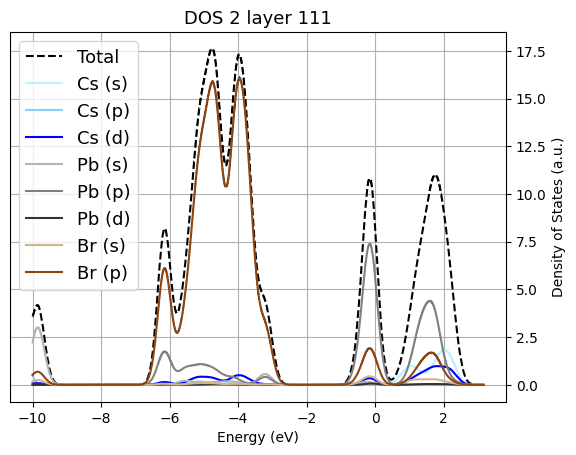

In [54]:
fig, ax_dos = plt.subplots(1,1)
#ax_dos.set_xlim(0,3)
ax_dos.plot(E,DOS, color='0', linewidth=1.5,linestyle = '--', label='Total')
for i in range(8):
    ax_dos.plot(np.array(dos_objects[i]['E(eV)']), np.array(dos_objects[i]['pdos(E)']), label = dos_legends[i], c= DOS_colors[i])
    ax_dos.yaxis.set_label_position("right")
    ax_dos.legend(loc='upper left', fontsize = 13)
    ax_dos.grid('--')
    ax_dos.yaxis.tick_right()
fig.subplots_adjust(wspace=0.05)
ax_dos.set_title('DOS 2 layer 111', fontsize = 13)
ax_dos.set_xlabel('Energy (eV)')
ax_dos.set_ylabel('Density of States (a.u.)')
plt.savefig('CsPbBr3/111/1-4/DOS_111-1-4.png', dpi = 200)

## 111-1-8

In [55]:
bandas = readband(r'CsPbBr3/111/1-8/band-CsPbBr3-111-1-8.gnu')

In [56]:
dos = pd.read_csv(r'CsPbBr3/111/1-8/dos_CsPbBr3-111-1-8.txt', sep = ' ')
dos_cs_s = pd.read_csv(r'CsPbBr3/111/1-8/DOS-Cs-s.txt', sep = ' ')
dos_cs_p = pd.read_csv(r'CsPbBr3/111/1-8/DOS-Cs-p.txt', sep = ' ')
dos_cs_d = pd.read_csv(r'CsPbBr3/111/1-8/DOS-Cs-d.txt', sep = ' ')
dos_pb_s = pd.read_csv(r'CsPbBr3/111/1-8/DOS-Pb-s.txt', sep = ' ')
dos_pb_p = pd.read_csv(r'CsPbBr3/111/1-8/DOS-Pb-p.txt', sep = ' ')
dos_pb_d = pd.read_csv(r'CsPbBr3/111/1-8/DOS-Pb-d.txt', sep = ' ')
dos_br_s = pd.read_csv(r'CsPbBr3/111/1-8/DOS-Br-s.txt', sep = ' ')
dos_br_p = pd.read_csv(r'CsPbBr3/111/1-8/DOS-Br-p.txt', sep = ' ')
dos_objects = [dos_cs_s, dos_cs_p, dos_cs_d, dos_pb_s, dos_pb_p, dos_pb_d, dos_br_s, dos_br_p]
dos_legends = ['Cs (s)', 'Cs (p)', 'Cs (d)', 'Pb (s)', 'Pb (p)', 'Pb (d)', 'Br (s)', 'Br (p)']

In [57]:
DOS = dos['dos(E)']
E = dos['E(eV)']
indices = list(bandas['k'])
len(indices)

61

indice: 47
Direct Band Gap = 0.675 eV


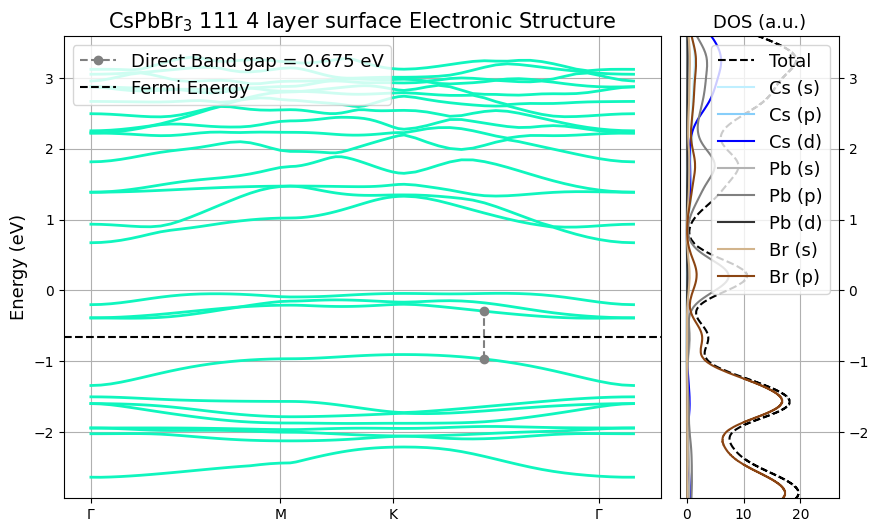

In [58]:
nbnd = len(bandas.keys())-1
k_nodes = [indices[0], indices[19], indices[38], indices[57]] 

fig, (ax, ax_dos) = plt.subplots(1, 2, figsize=(10, 6), gridspec_kw={'width_ratios': [3, 0.8]})

for i in range(80,nbnd):
#for i in range(0,nbnd):    
    ax.plot(bandas['k'], bandas['e'+str(i)], c = '#0ff6be', linewidth = 2)
    
#ax.plot(bandas['k'], bandas['e87'], c = '0.7', linewidth = 1.5) #Valence band
#ax.plot(bandas['k'], bandas['e88'], c = '0.7', linewidth = 1.5) # conduction band

fermi = -0.6517
# Band Gap:

bg = min(np.array(bandas['e88'])- np.array(bandas['e87']))
print('indice:', list(np.array(bandas['e88'])- np.array(bandas['e87'])).index(bg))
print('Direct Band Gap =', bg, 'eV')
x1, y1 = bandas['k'][47], bandas['e87'][47]
x2, y2 = bandas['k'][47], bandas['e88'][47]
ax.plot([x1, x2], [y1, y2], color='0.5', linestyle='--', marker='o', label=f'Direct Band gap = {bg:.3f} eV')

#plot:
ax.set_xticks(k_nodes)
ax.set_xticklabels(["$\Gamma$","M", "K", "$\Gamma$"])
ax.grid('--')
ax.set_title(r'CsPbBr$_3$ 111 4 layer surface Electronic Structure', fontsize = 15)
ax.axhline(fermi, linestyle = '--', color = '0', label = 'Fermi Energy')
ax.legend(loc = 'upper left', fontsize = 13)
ax.set_ylabel('Energy (eV)', fontsize = 13)


#DOS
ax_dos.set_title('DOS (a.u.)', fontsize = 13)
#ax_dos.set_xlim(0,3)
ax_dos.plot(DOS, E, color='0', label='Total', linestyle = '--')
for i in range(8):
    ax_dos.plot(np.array(dos_objects[i]['pdos(E)']),np.array(dos_objects[i]['E(eV)']), label = dos_legends[i], c= DOS_colors[i])
    ax_dos.yaxis.set_label_position("right")
    ax_dos.legend(loc='upper right', fontsize = 13)
    ax_dos.grid('--')
    ax_dos.yaxis.tick_right()
fig.subplots_adjust(wspace=0.05) 
ax_dos.set_ylim(ax.get_ylim())  

plt.savefig(r'CsPbBr3/111/1-8/banda_CsPbBr3-111-1-8.png', dpi = 200)

#fig, ax_dos_111 = plt.subplots(1,1)
#ax_dos_111.set_xlim(0,3)
ax_dos_111.plot(E,DOS, color='0', linewidth=1.5,linestyle = '--', label='Total')
for i in range(8):
    ax_dos_111.plot(np.array(dos_objects[i]['E(eV)']), np.array(dos_objects[i]['pdos(E)']), label = dos_legends[i], c= DOS_colors[i])
    #ax_dos_111.yaxis.set_label_position("right")
    #ax_dos_111.legend(loc='upper right', fontsize = 13)
    ax_dos_111.grid('--')
    #ax_dos_111.yaxis.tick_right()
fig.subplots_adjust(wspace=0.05)

ax_dos_111.axvline(fermi, linestyle = '--', c = 'r', linewidth=1.5, label = 'Fermi Energy')

#plt.savefig('CsPbBr3/111/1-8/DOS_111-1-8.png', dpi = 200)

## 111-1-10

In [59]:
bandas = readband(r'CsPbBr3/111/1-10/band-CsPbBr3-111-1-10.gnu')

In [60]:
dos = pd.read_csv(r'CsPbBr3/111/1-10/dos_CsPbBr3-111-1-10.txt', sep = ' ')
dos_cs_s = pd.read_csv(r'CsPbBr3/111/1-10/DOS-Cs-s.txt', sep = ' ')
dos_cs_p = pd.read_csv(r'CsPbBr3/111/1-10/DOS-Cs-p.txt', sep = ' ')
dos_cs_d = pd.read_csv(r'CsPbBr3/111/1-10/DOS-Cs-d.txt', sep = ' ')
dos_pb_s = pd.read_csv(r'CsPbBr3/111/1-10/DOS-Pb-s.txt', sep = ' ')
dos_pb_p = pd.read_csv(r'CsPbBr3/111/1-10/DOS-Pb-p.txt', sep = ' ')
dos_pb_d = pd.read_csv(r'CsPbBr3/111/1-10/DOS-Pb-d.txt', sep = ' ')
dos_br_s = pd.read_csv(r'CsPbBr3/111/1-10/DOS-Br-s.txt', sep = ' ')
dos_br_p = pd.read_csv(r'CsPbBr3/111/1-10/DOS-Br-p.txt', sep = ' ')
dos_objects = [dos_cs_s, dos_cs_p, dos_cs_d, dos_pb_s, dos_pb_p, dos_pb_d, dos_br_s, dos_br_p]
dos_legends = ['Cs (s)', 'Cs (p)', 'Cs (d)', 'Pb (s)', 'Pb (p)', 'Pb (d)', 'Br (s)', 'Br (p)']

In [61]:
DOS = dos['dos(E)']
E = dos['E(eV)']
indices = list(bandas['k'])
len(indices)

61

indice: 30
Band Gap = 0.3568 eV


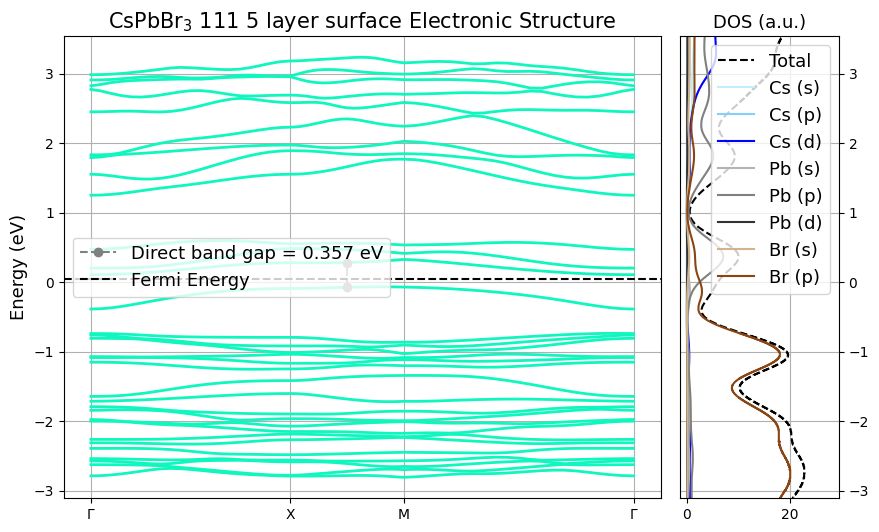

In [62]:
nbnd = len(bandas.keys())-1
k_nodes = [indices[0], indices[20], indices[40], indices[60]] 
#print(k_nodes)

fig, (ax, ax_dos) = plt.subplots(1, 2, figsize=(10, 6), gridspec_kw={'width_ratios': [3, 0.8]})

for i in range(90,nbnd-10):
#for i in range(0,nbnd):
    ax.plot(bandas['k'], bandas['e'+str(i)], c = '#0ff6be', linewidth = 2)
    
#ax.plot(bandas['k'], bandas['e109'], c = 'r', linewidth = 1.5) #Valence band
#ax.plot(bandas['k'], bandas['e110'], c = 'r', linewidth = 1.5) # conduction band

fermi = 0.0408

# Band Gap:
bg = min(np.array(bandas['e110'])- np.array(bandas['e109']))
print('indice:', list(np.array(bandas['e110'])- np.array(bandas['e109'])).index(bg))
x1, y1 = bandas['k'][30], bandas['e109'][30]
x2, y2 = bandas['k'][30], bandas['e110'][30]
ax.plot([x1, x2], [y1, y2], color='0.5', linestyle='--', marker='o', label=f'Direct band gap = {bg:.3f} eV')

print('Band Gap =', bg, 'eV')

ax.set_xticks(k_nodes)
ax.set_xticklabels(["$\Gamma$","X","M","$\Gamma$"])
ax.grid('--')
ax.set_title(r'CsPbBr$_3$ 111 5 layer surface Electronic Structure', fontsize = 15)
ax.axhline(fermi, linestyle = '--', color = '0', label = 'Fermi Energy')
ax.legend(loc = 'center left', fontsize = 13)
ax.set_ylabel('Energy (eV)', fontsize = 13)

#DOS
ax_dos.set_title('DOS (a.u.)', fontsize = 13)
#ax_dos.set_xlim(0,3)
ax_dos.plot(DOS, E, color='0', label='Total', linestyle = '--')
for i in range(8):
    ax_dos.plot(np.array(dos_objects[i]['pdos(E)']),np.array(dos_objects[i]['E(eV)']), label = dos_legends[i], c= DOS_colors[i])
    ax_dos.yaxis.set_label_position("right")
    ax_dos.legend(loc='upper right', fontsize = 13)
    ax_dos.grid('--')
    ax_dos.yaxis.tick_right()
fig.subplots_adjust(wspace=0.05) 
ax_dos.set_ylim(ax.get_ylim())  

plt.savefig(r'CsPbBr3/111/1-10/banda_CsPbBr3-111-1-10.png', dpi = 200)

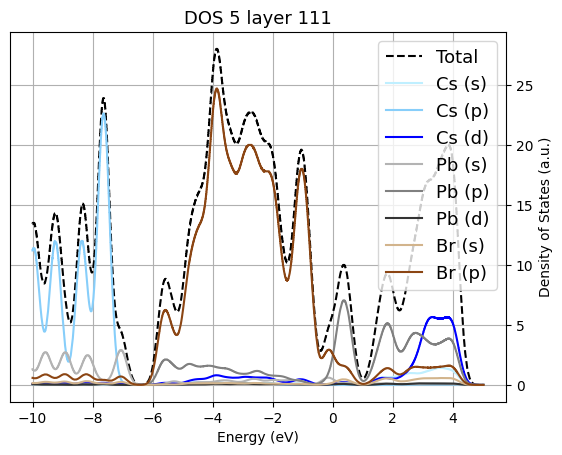

In [63]:
fig, ax_dos = plt.subplots(1,1)
ax_dos.set_title('DOS (a.u.)', fontsize = 13)
#ax_dos.set_xlim(0,3)
ax_dos.plot(E,DOS, color='0', linewidth=1.5,linestyle = '--', label='Total')
for i in range(8):
    ax_dos.plot(np.array(dos_objects[i]['E(eV)']), np.array(dos_objects[i]['pdos(E)']), label = dos_legends[i], c= DOS_colors[i])
    ax_dos.yaxis.set_label_position("right")
    ax_dos.legend(loc='upper right', fontsize = 13)
    ax_dos.grid('--')
    ax_dos.yaxis.tick_right()
fig.subplots_adjust(wspace=0.05)
ax_dos.set_title('DOS 5 layer 111', fontsize = 13)
ax_dos.set_xlabel('Energy (eV)')
ax_dos.set_ylabel('Density of States (a.u.)')
plt.savefig('CsPbBr3/111/1-10/DOS_111-1-10.png', dpi = 200)

# BANDAS FINAL:

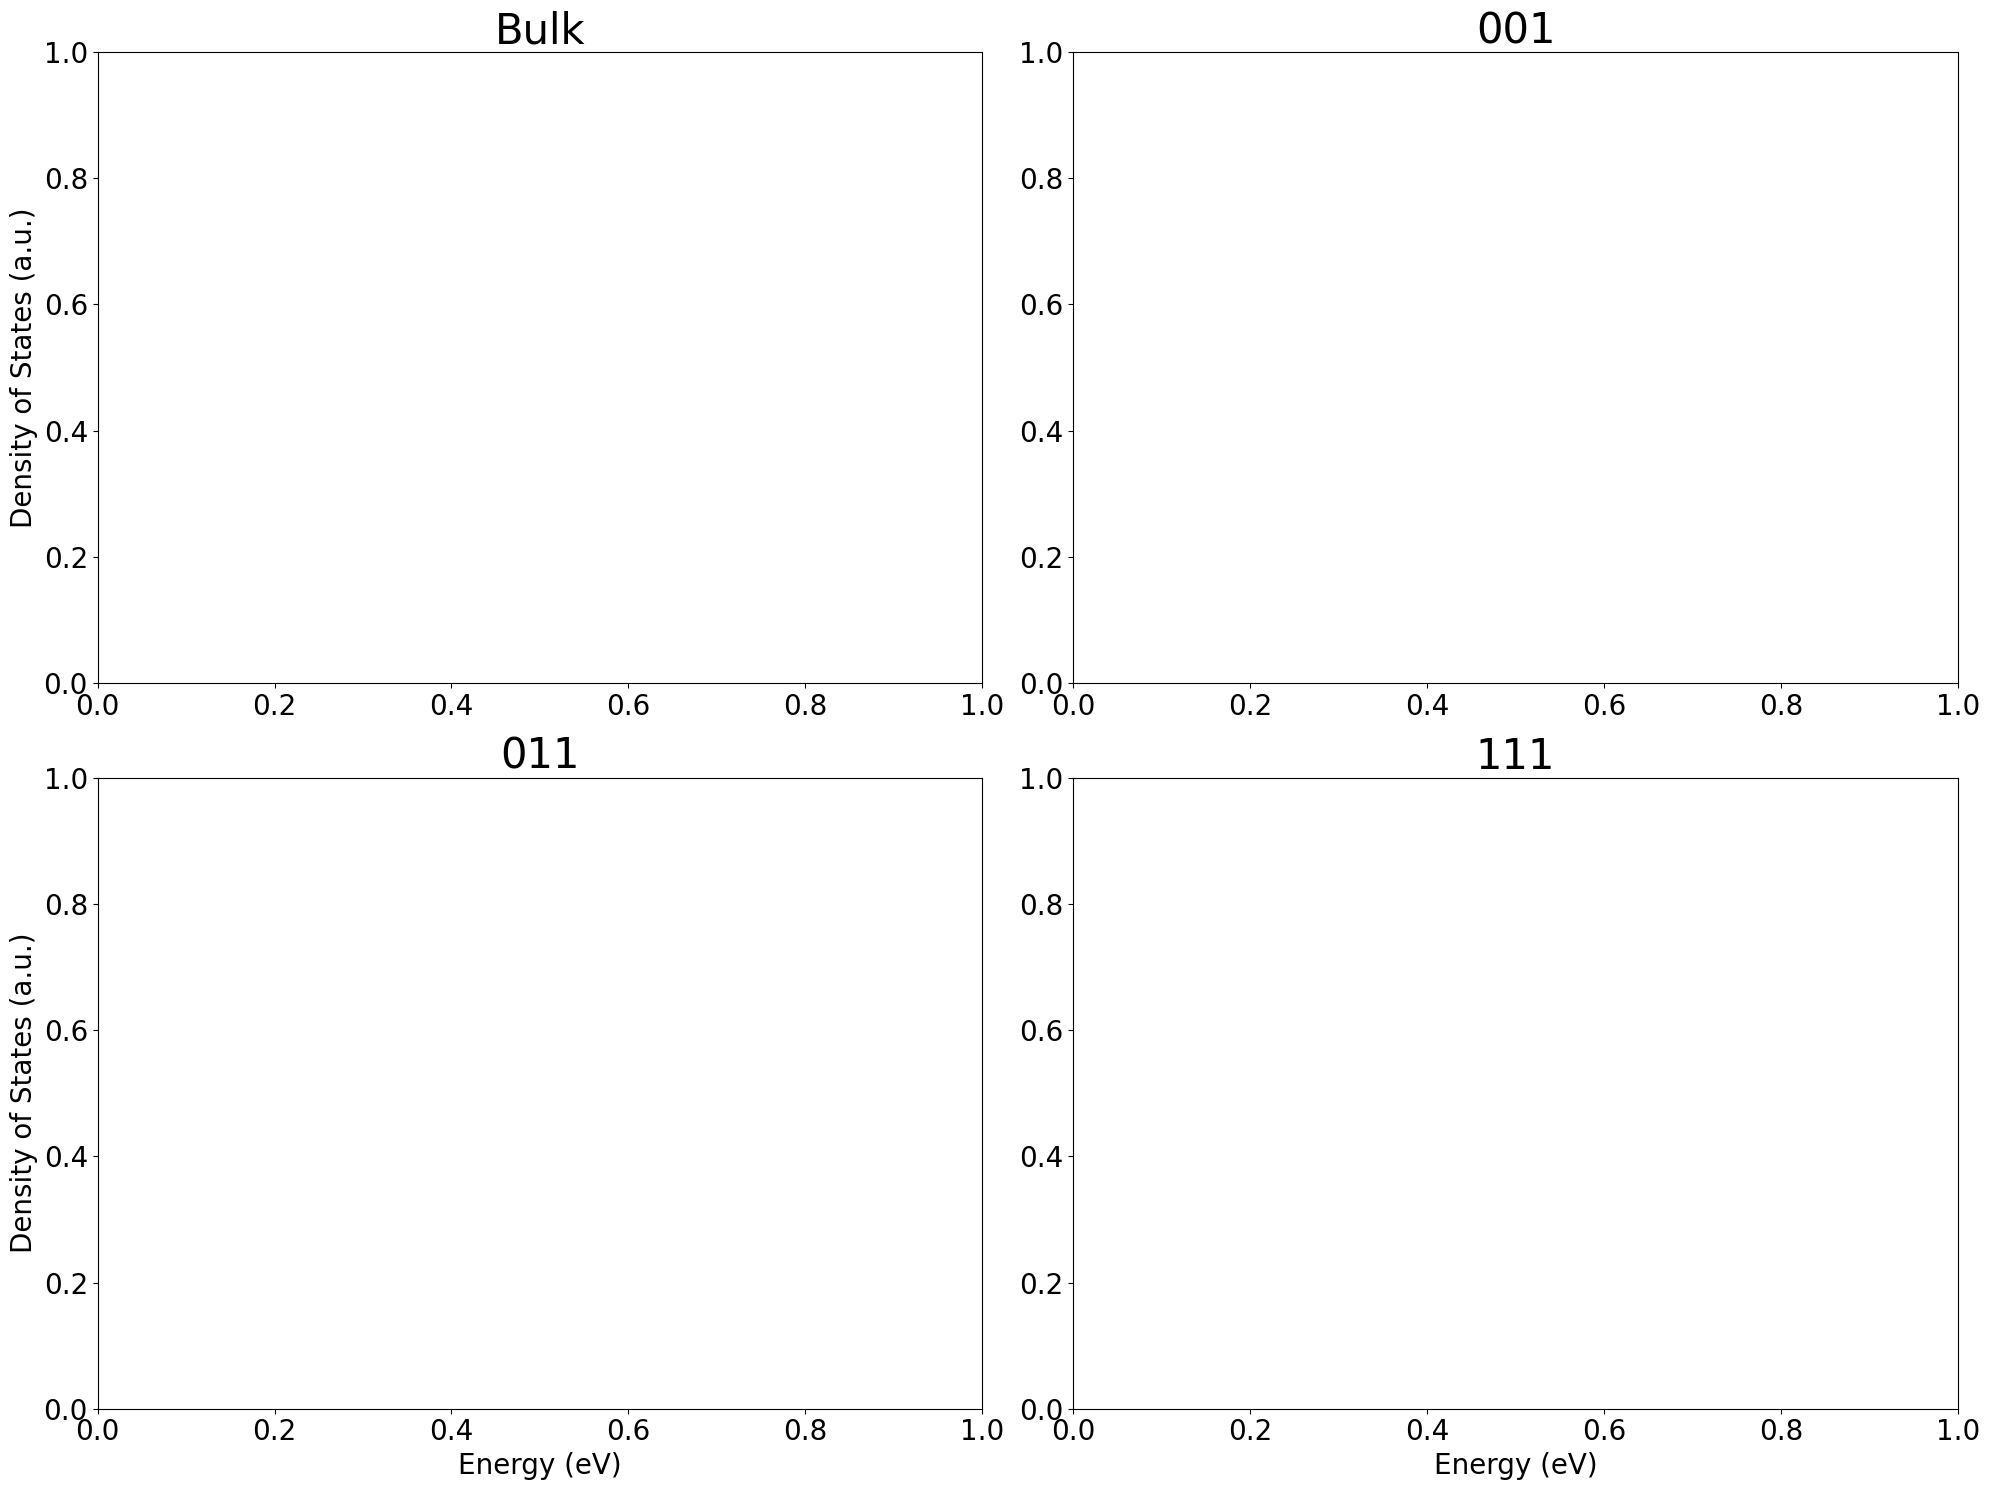

In [64]:
figdos, [[ax_dos_bulk, ax_dos_001], [ax_dos_011, ax_dos_111]] = plt.subplots(2,2, figsize = [20,15])

ax_dos_bulk.set_title('Bulk', fontsize = 30)
#ax_dos_bulk.set_xlabel('Energy (eV)', fontsize = 20)
ax_dos_bulk.set_ylabel('Density of States (a.u.)', fontsize = 20)
ax_dos_bulk.tick_params(axis='both', which='major', labelsize=20)

ax_dos_001.set_title('001', fontsize = 30)
#ax_dos_001.set_xlabel('Energy (eV)', fontsize = 20)
#ax_dos_001.set_ylabel('Density of States (a.u.)', fontsize = 20)
ax_dos_001.tick_params(axis='both', which='major', labelsize=20)


ax_dos_011.set_title('011', fontsize = 30)
ax_dos_011.set_xlabel('Energy (eV)', fontsize = 20)
ax_dos_011.set_ylabel('Density of States (a.u.)', fontsize = 20)
ax_dos_011.tick_params(axis='both', which='major', labelsize=20)


ax_dos_111.set_title('111', fontsize = 30)
ax_dos_111.set_xlabel('Energy (eV)', fontsize = 20)
#ax_dos_111.set_ylabel('Density of States (a.u.)', fontsize = 20)
ax_dos_111.tick_params(axis='both', which='major', labelsize=20)


plt.tight_layout()


# BULK

In [65]:
fermi = 3.9128

In [66]:
dos = pd.read_csv(r'CsPbBr3/dos_CsPbBr3.txt', sep = ' ')
dos_cs_s = pd.read_csv(r'CsPbBr3/DOS-Cs-s.txt', sep = ' ')
dos_cs_p = pd.read_csv(r'CsPbBr3/DOS-Cs-p.txt', sep = ' ')
dos_cs_d = pd.read_csv(r'CsPbBr3/DOS-Cs-d.txt', sep = ' ')
dos_pb_s = pd.read_csv(r'CsPbBr3/DOS-Pb-s.txt', sep = ' ')
dos_pb_p = pd.read_csv(r'CsPbBr3/DOS-Pb-p.txt', sep = ' ')
dos_pb_d = pd.read_csv(r'CsPbBr3/DOS-Pb-d.txt', sep = ' ')
dos_br_s = pd.read_csv(r'CsPbBr3/DOS-Br-s.txt', sep = ' ')
dos_br_p = pd.read_csv(r'CsPbBr3/DOS-Br-p.txt', sep = ' ')
dos_objects = [dos_cs_s, dos_cs_p, dos_cs_d, dos_pb_s, dos_pb_p, dos_pb_d, dos_br_s, dos_br_p]
dos_legends = ['Cs (s)', 'Cs (p)', 'Cs (d)', 'Pb (s)', 'Pb (p)', 'Pb (d)', 'Br (s)', 'Br (p)']

In [67]:
DOS = dos['dos(E)']
E = dos['E(eV)']

In [68]:
indices = list(bandas['k'])
len(indices)

61

In [69]:
#fig, ax_dos_001 = plt.subplots(1,1)
#ax_dos_001.set_title('DOS (a.u.)', fontsize = 13)
#ax_dos_001.set_xlim(0,3)
ax_dos_bulk.plot(E,DOS, color='0', linewidth=1.5,linestyle = '--', label='Total')
for i in range(8):
    ax_dos_bulk.plot(np.array(dos_objects[i]['E(eV)']), np.array(dos_objects[i]['pdos(E)']), label = dos_legends[i], c= DOS_colors[i])
    #ax_dos_001.yaxis.set_label_position("right")
    #ax_dos_001.legend(loc='upper right', fontsize = 13)
    ax_dos_bulk.grid('--')
    #ax_dos_001.yaxis.tick_right()
#fig.subplots_adjust(wspace=0.05)
ax_dos_bulk.axvline(fermi, linestyle = '--', c = 'r', linewidth=1.5, label = 'Fermi Energy')

#plt.savefig('CsPbBr3/001/1-8/DOS_001-1-8.png', dpi = 200)

In [20]:
bandas = readband(r'BANDS/001/band-cspbbr3.gnu')

In [21]:
dos = pd.read_csv(r'BANDS/001/dos_CsPbBr3.txt', sep = ' ')
dos_cs_s = pd.read_csv(r'BANDS/001/Cs-s.txt', sep = ' ')
dos_cs_p = pd.read_csv(r'BANDS/001/Cs-p.txt', sep = ' ')
dos_cs_d = pd.read_csv(r'BANDS/001/Cs-d.txt', sep = ' ')
dos_pb_s = pd.read_csv(r'BANDS/001/Pb-s.txt', sep = ' ')
dos_pb_p = pd.read_csv(r'BANDS/001/Pb-p.txt', sep = ' ')
dos_pb_d = pd.read_csv(r'BANDS/001/Pb-d.txt', sep = ' ')
dos_br_s = pd.read_csv(r'BANDS/001/Br-s.txt', sep = ' ')
dos_br_p = pd.read_csv(r'BANDS/001/Br-p.txt', sep = ' ')
dos_objects = [dos_cs_s, dos_cs_p, dos_cs_d, dos_pb_s, dos_pb_p, dos_pb_d, dos_br_s, dos_br_p]
dos_legends = ['Cs (s)', 'Cs (p)', 'Cs (d)', 'Pb (s)', 'Pb (p)', 'Pb (d)', 'Br (s)', 'Br (p)']

In [22]:
DOS = dos['dos(E)']
E = dos['E(eV)']
indices = list(bandas['k'])
len(indices)

91

indice: 75
-0.5361 e 1.2266
Band Gap = 1.7627 eV


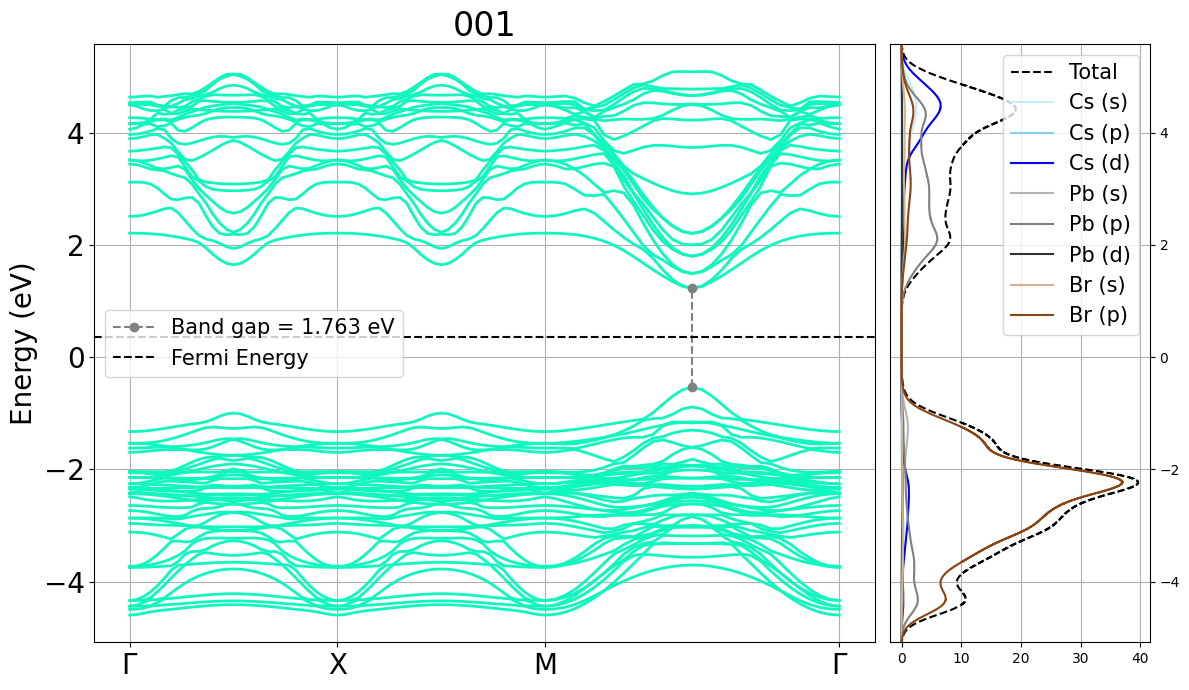

In [23]:
nbnd = len(bandas.keys())-1
k_nodes = [indices[0], indices[30], indices[60], indices[90]] 
#print(k_nodes)

fig, (ax, ax_dos) = plt.subplots(1, 2, figsize=(12, 7), gridspec_kw={'width_ratios': [3, 1]})

for i in range(53,nbnd):
#for i in range(0,nbnd):
    ax.plot(bandas['k'], bandas['e'+str(i)], c = '#0ff6be', linewidth = 2)
    
#ax.plot(bandas['k'], bandas['e59'], c = '0.7', linewidth = 1.5) #Valence band
#ax.plot(bandas['k'], bandas['e60'], c = '0.7', linewidth = 1.5) # conduction band

fermi = 0.3664

# Band Gap:
bg = min(np.array(bandas['e88'])- np.array(bandas['e87']))
print('indice:', list(np.array(bandas['e88'])- np.array(bandas['e87'])).index(bg))
x1, y1 = bandas['k'][75], bandas['e87'][75]
x2, y2 = bandas['k'][75], bandas['e88'][75]
print(y1,'e', y2)
ax.plot([x1, x2], [y1, y2], color='0.5', linestyle='--', marker='o', label=f'Band gap = {bg:.3f} eV')

print('Band Gap =', bg, 'eV')

ax.set_xticks(k_nodes)
ax.set_xticklabels(["$\Gamma$","X","M","$\Gamma$"], fontsize = 20)
ax.grid('--')
ax.set_title(r'001', fontsize = 24)
ax.axhline(fermi, linestyle = '--', color = '0', label = 'Fermi Energy')
ax.legend(loc = 'center left', fontsize = 15)
ax.set_ylabel('Energy (eV)', fontsize = 20)
ax.tick_params(axis='y', labelsize=20)


#DOS
#ax_dos.set_title('DOS (a.u.)', fontsize = 15)
#ax_dos.set_xlim(0,3)
ax_dos.plot(DOS, E, color='0', label='Total', linestyle = '--')
for i in range(8):
    ax_dos.plot(np.array(dos_objects[i]['pdos(E)']),np.array(dos_objects[i]['E (eV)']), label = dos_legends[i], c= DOS_colors[i])
    ax_dos.yaxis.set_label_position("right")
    ax_dos.legend(loc='upper right', fontsize = 15)
    ax_dos.grid('--')
    ax_dos.yaxis.tick_right()
fig.subplots_adjust(wspace=0.05) 
ax_dos.set_ylim(ax.get_ylim())  
#ax_dos.tick_params(axis='y', labelsize=20)

plt.tight_layout()

plt.savefig(r'BANDS/banda_CsPbBr3-001.png', dpi = 200)

In [74]:
#fig, ax_dos_bulk = plt.subplots(1,1)

ax_dos_001.plot(E,DOS, color='0', linewidth=1.5,linestyle = '--', label='Total')
for i in range(8):
    ax_dos_001.plot(np.array(dos_objects[i]['E (eV)']), np.array(dos_objects[i]['pdos(E)']), label = dos_legends[i], c= DOS_colors[i])
    #ax_dos_bulk.yaxis.set_label_position("right")
    #ax_dos_bulk.legend(loc='upper left', fontsize = 13)
    ax_dos_001.grid('--')
    #ax_dos_bulk.yaxis.tick_right()
#fig.subplots_adjust(wspace=0.05)
ax_dos_001.axvline(fermi, linestyle = '--', c = 'r', linewidth=1.5, label = r'E$_{fermi}$')

#plt.savefig('CsPbBr3/DOS_BULK.png', dpi = 200)

In [28]:
bandas = readband(r'BANDS/011/band-cspbbr3.gnu')

In [29]:
dos = pd.read_csv(r'BANDS/011/dos_CsPbBr3.txt', sep = ' ')
dos_cs_s = pd.read_csv(r'BANDS/011/Cs-s.txt', sep = ' ')
dos_cs_p = pd.read_csv(r'BANDS/011/Cs-p.txt', sep = ' ')
dos_cs_d = pd.read_csv(r'BANDS/011/Cs-d.txt', sep = ' ')
dos_pb_s = pd.read_csv(r'BANDS/011/Pb-s.txt', sep = ' ')
dos_pb_p = pd.read_csv(r'BANDS/011/Pb-p.txt', sep = ' ')
dos_pb_d = pd.read_csv(r'BANDS/011/Pb-d.txt', sep = ' ')
dos_br_s = pd.read_csv(r'BANDS/011/Br-s.txt', sep = ' ')
dos_br_p = pd.read_csv(r'BANDS/011/Br-p.txt', sep = ' ')
dos_objects = [dos_cs_s, dos_cs_p, dos_cs_d, dos_pb_s, dos_pb_p, dos_pb_d, dos_br_s, dos_br_p]
dos_legends = ['Cs (s)', 'Cs (p)', 'Cs (d)', 'Pb (s)', 'Pb (p)', 'Pb (d)', 'Br (s)', 'Br (p)']

In [30]:
DOS = dos['dos(E)']
E = dos['E(eV)']
indices = list(bandas['k'])
len(indices)

91

-0.1361 e 0.0593


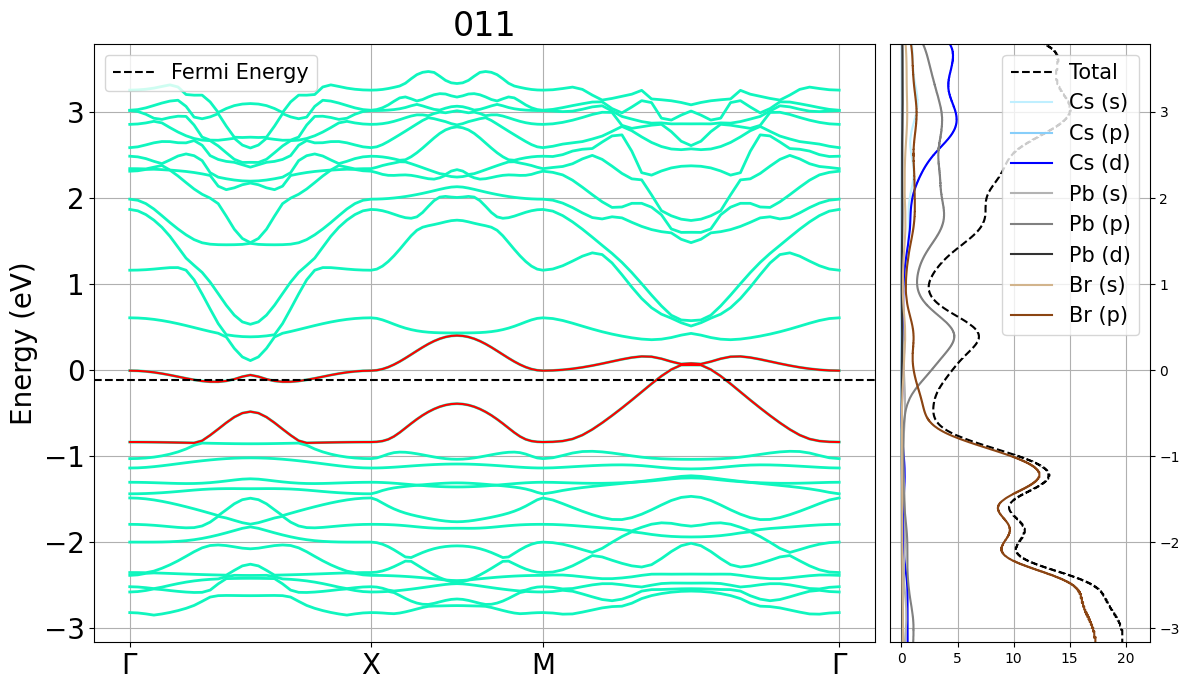

In [31]:
nbnd = len(bandas.keys())-1
k_nodes = [indices[0], indices[30], indices[60], indices[90]] 

fig, (ax, ax_dos) = plt.subplots(1, 2, figsize=(12, 7), gridspec_kw={'width_ratios': [3, 1]})

for i in range(75,nbnd-5):
#for i in range(0,nbnd):    
    ax.plot(bandas['k'], bandas['e'+str(i)], c = '#0ff6be', linewidth = 2)
    
ax.plot(bandas['k'], bandas['e87'], c = 'r', linewidth = 1.5) #Valence band
ax.plot(bandas['k'], bandas['e88'], c = 'r', linewidth = 1.5) # conduction band

fermi = -0.1096
# Band Gap:

print(min(bandas['e88']), 'e', max(bandas['e87']))
#bg = min(np.array(bandas['e88'])- np.array(bandas['e87']))
#print('indice:', list(np.array(bandas['e88'])- np.array(bandas['e87'])).index(bg))
#print('Direct Band Gap =', bg, 'eV')
x1, y1 = bandas['k'][74], bandas['e87'][74]
x2, y2 = bandas['k'][74], bandas['e88'][74]
#ax.plot([x1, x2], [y1, y2], color='0.5', linestyle='--', marker='o', label=f'Direct Band gap = {bg:.3f} eV')

#plot:
ax.set_xticks(k_nodes)
ax.set_xticklabels(["$\Gamma$","X","M","$\Gamma$"], fontsize = 20)
ax.grid('--')
ax.set_title(r'011', fontsize = 24)
ax.axhline(fermi, linestyle = '--', color = '0', label = 'Fermi Energy')
ax.legend(loc = 'upper left', fontsize = 15)
ax.set_ylabel('Energy (eV)', fontsize = 20)
ax.tick_params(axis='y', labelsize=20)



#DOS
#ax_dos.set_title('DOS (a.u.)', fontsize = 13)
#ax_dos.set_xlim(0,3)
ax_dos.plot(DOS, E, color='0', label='Total', linestyle = '--')
for i in range(8):
    ax_dos.plot(np.array(dos_objects[i]['pdos(E)']),np.array(dos_objects[i]['E (eV)']), label = dos_legends[i], c= DOS_colors[i])
    ax_dos.yaxis.set_label_position("right")
    ax_dos.legend(loc='upper right', fontsize = 15)
    ax_dos.grid('--')
    ax_dos.yaxis.tick_right()
fig.subplots_adjust(wspace=0.05) 
ax_dos.set_ylim(ax.get_ylim())  
plt.tight_layout()


plt.savefig(r'BANDS/banda_CsPbBr3-011.png', dpi = 200)

In [79]:
#fig, ax_dos_bulk = plt.subplots(1,1)

ax_dos_011.plot(E,DOS, color='0', linewidth=1.5,linestyle = '--', label='Total')
for i in range(8):
    ax_dos_011.plot(np.array(dos_objects[i]['E (eV)']), np.array(dos_objects[i]['pdos(E)']), label = dos_legends[i], c= DOS_colors[i])
    #ax_dos_bulk.yaxis.set_label_position("right")
    #ax_dos_bulk.legend(loc='upper left', fontsize = 13)
    ax_dos_011.grid('--')
    #ax_dos_bulk.yaxis.tick_right()
#fig.subplots_adjust(wspace=0.05)
ax_dos_011.axvline(fermi, linestyle = '--', c = 'r', linewidth=1.5, label = r'E$_{fermi}$')

#plt.savefig('CsPbBr3/DOS_BULK.png', dpi = 200)

In [34]:
bandas = readband(r'BANDS/111/band-cspbbr3.gnu')

In [35]:
dos = pd.read_csv(r'BANDS/111/dos_CsPbBr3.txt', sep = ' ')
dos_cs_s = pd.read_csv(r'BANDS/111/Cs-s.txt', sep = ' ')
dos_cs_p = pd.read_csv(r'BANDS/111/Cs-p.txt', sep = ' ')
dos_cs_d = pd.read_csv(r'BANDS/111/Cs-d.txt', sep = ' ')
dos_pb_s = pd.read_csv(r'BANDS/111/Pb-s.txt', sep = ' ')
dos_pb_p = pd.read_csv(r'BANDS/111/Pb-p.txt', sep = ' ')
dos_pb_d = pd.read_csv(r'BANDS/111/Pb-d.txt', sep = ' ')
dos_br_s = pd.read_csv(r'BANDS/111/Br-s.txt', sep = ' ')
dos_br_p = pd.read_csv(r'BANDS/111/Br-p.txt', sep = ' ')
dos_objects = [dos_cs_s, dos_cs_p, dos_cs_d, dos_pb_s, dos_pb_p, dos_pb_d, dos_br_s, dos_br_p]
dos_legends = ['Cs (s)', 'Cs (p)', 'Cs (d)', 'Pb (s)', 'Pb (p)', 'Pb (d)', 'Br (s)', 'Br (p)']

In [36]:
DOS = dos['dos(E)']
E = dos['E(eV)']
indices = list(bandas['k'])
len(indices)

91

indice: 70
Direct Band Gap = 0.741 eV
-0.5686 e 0.0057


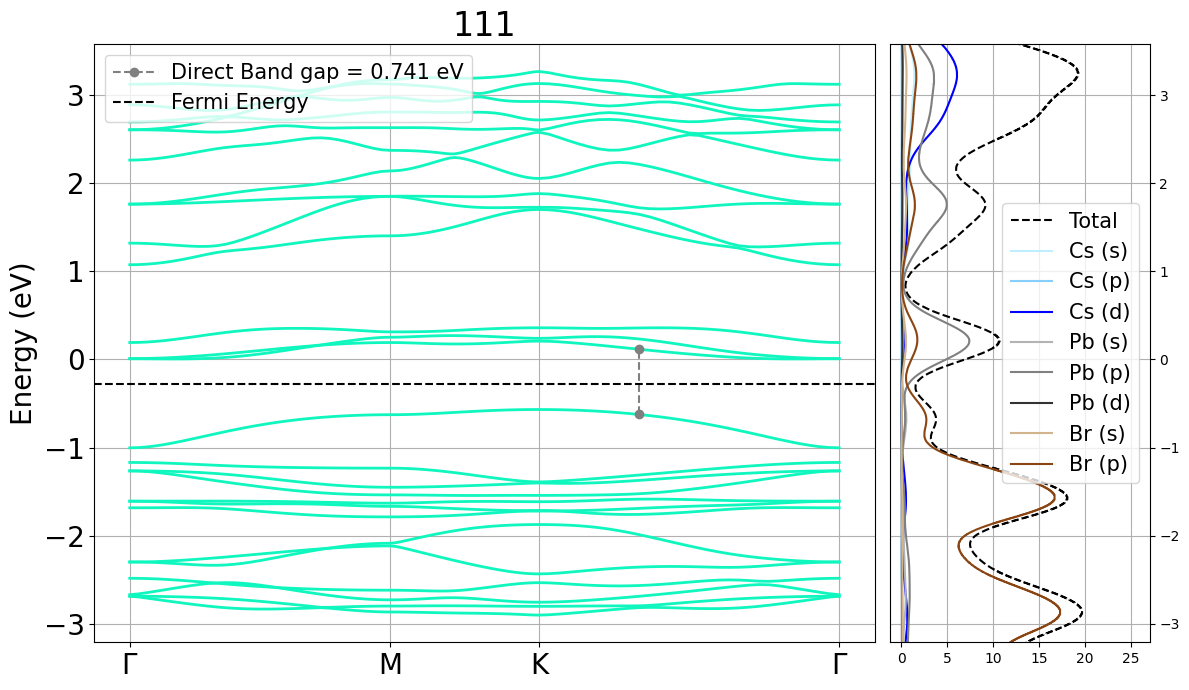

In [39]:
nbnd = len(bandas.keys())-1
k_nodes = [indices[0], indices[30], indices[60], indices[90]] 

fig, (ax, ax_dos) = plt.subplots(1, 2, figsize=(12, 7), gridspec_kw={'width_ratios': [3, 1]})

for i in range(75,nbnd-5):
#for i in range(0,nbnd):    
    ax.plot(bandas['k'], bandas['e'+str(i)], c = '#0ff6be', linewidth = 2)
    
#ax.plot(bandas['k'], bandas['e87'], c = 'r', linewidth = 1.5) #Valence band
#ax.plot(bandas['k'], bandas['e88'], c = 'r', linewidth = 1.5) # conduction band

fermi = -0.2839
# Band Gap:

bg = min(np.array(bandas['e88'])- np.array(bandas['e87']))
print('indice:', list(np.array(bandas['e88'])- np.array(bandas['e87'])).index(bg))
print('Direct Band Gap =', bg, 'eV')
x1, y1 = bandas['k'][70], bandas['e87'][70]
x2, y2 = bandas['k'][70], bandas['e88'][70]
ax.plot([x1, x2], [y1, y2], color='0.5', linestyle='--', marker='o', label=f'Direct Band gap = {bg:.3f} eV')
print(max(bandas['e87']), 'e', min(bandas['e88']))
#plot:
ax.set_xticks(k_nodes)
ax.set_xticklabels(["$\Gamma$","M","K","$\Gamma$"], fontsize = 20)
ax.grid('--')
ax.set_title(r'111', fontsize = 24)
ax.axhline(fermi, linestyle = '--', color = '0', label = 'Fermi Energy')
ax.legend(loc = 'upper left', fontsize = 15)
ax.set_ylabel('Energy (eV)', fontsize = 20)
ax.tick_params(axis='y', labelsize=20)



#DOS
#ax_dos.set_title('DOS (a.u.)', fontsize = 13)
#ax_dos.set_xlim(0,3)
ax_dos.plot(DOS, E, color='0', label='Total', linestyle = '--')
for i in range(8):
    ax_dos.plot(np.array(dos_objects[i]['pdos(E)']),np.array(dos_objects[i]['E (eV)']), label = dos_legends[i], c= DOS_colors[i])
    ax_dos.yaxis.set_label_position("right")
    ax_dos.legend(loc='center right', fontsize = 15)
    ax_dos.grid('--')
    ax_dos.yaxis.tick_right()
fig.subplots_adjust(wspace=0.05) 
ax_dos.set_ylim(ax.get_ylim())  
plt.tight_layout()


plt.savefig(r'BANDS/banda_CsPbBr3-111.png', dpi = 200)

In [84]:
#fig, ax_dos_bulk = plt.subplots(1,1)

ax_dos_111.plot(E,DOS, color='0', linewidth=1.5,linestyle = '--', label='Total')
for i in range(8):
    ax_dos_111.plot(np.array(dos_objects[i]['E (eV)']), np.array(dos_objects[i]['pdos(E)']), label = dos_legends[i], c= DOS_colors[i])
    #ax_dos_bulk.yaxis.set_label_position("right")
    #ax_dos_bulk.legend(loc='upper left', fontsize = 13)
    ax_dos_111.grid('--')
    #ax_dos_bulk.yaxis.tick_right()
#fig.subplots_adjust(wspace=0.05)
ax_dos_111.axvline(fermi, linestyle = '--', c = 'r', linewidth=1.5, label = r'E$_{fermi}$')

#plt.savefig('CsPbBr3/DOS_BULK.png', dpi = 200)

# POLIEDRO

In [85]:
X = [0,1,2,2,3,3]
Y = [0.02, 0.35, 0.27, 0.3, 0.27, 0.23]

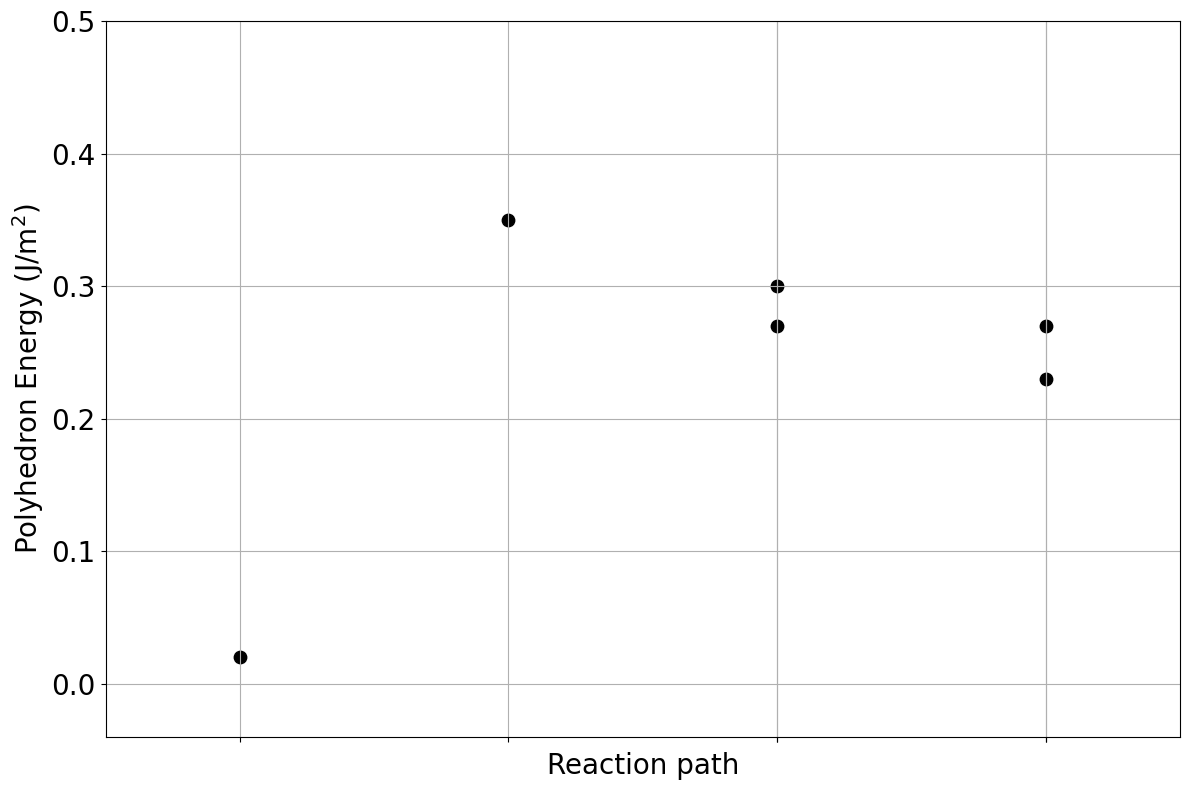

In [86]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
ax.scatter(X,Y, c = '0', s = 80)
ax.grid('--')
ax.set_ylabel(r'Polyhedron Energy (J/m$^2$)', fontsize = 20)
ax.set_xticks(X)
ax.set_xticklabels([])
ax.set_xlabel('Reaction path', fontsize = 20)
ax.tick_params(axis='y', labelsize=20)
ax.set_ylim(-0.04, 0.5)
ax.set_xlim(-0.5, 3.5)


plt.tight_layout()
plt.savefig('CsPbBr3/Epol.png', dpi = 200)

# Bar Bands:

BULK: 3.1919 e 4.8788

001: -0.5361 e 1.2266

011: 0.0593 e -0.1361 

In [87]:
ax_dos_bulk.legend(fontsize = 24, loc = 'upper left')


figdos.savefig('DOS_mult.png', dpi = 200)

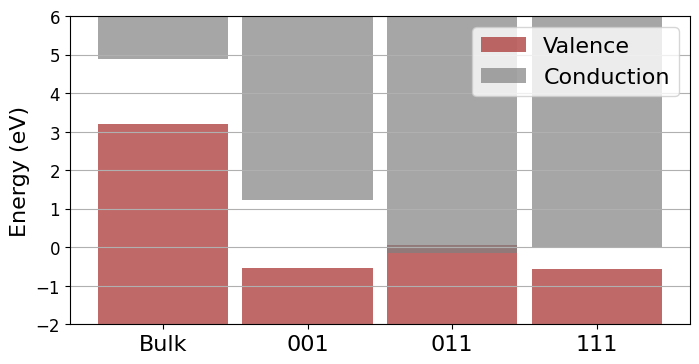

In [76]:
fig, ax_bar = plt.subplots(1,1, figsize = [8,4])
VBC = 'brown'
CBC = '0.5'
bottom = -2
top = 6
#BULK:
ax_bar.bar(1, 3.1919 - bottom, color=VBC, label='Valence', bottom = bottom, width = 0.9, alpha = 0.7)
ax_bar.bar(1, 4.8788 - top,  color=CBC, label='Conduction', bottom=top, width = 0.9, alpha = 0.7)
#001:
ax_bar.bar(2, -0.5361 - bottom, color=VBC, bottom = bottom, width = 0.9, alpha = 0.7)
ax_bar.bar(2, 1.2266 - top,  color=CBC, bottom=top, width = 0.9, alpha = 0.7)
#011:
ax_bar.bar(3, 0.0593 - bottom, color=VBC, bottom = bottom, width = 0.9, alpha = 0.7)
ax_bar.bar(3, -0.1361  - top,  color=CBC, bottom=top, width = 0.9, alpha = 0.7)
#111:
ax_bar.bar(4, -0.5686 - bottom, color=VBC, bottom = bottom, width = 0.9, alpha = 0.7)
ax_bar.bar(4, 0.0057  - top,  color=CBC, bottom=top, width = 0.9, alpha = 0.7)


ax_bar.set_xticks([1,2,3,4])
ax_bar.set_xticklabels(["Bulk","001","011", "111"],fontsize = 16)
ax_bar.tick_params(axis='y', labelsize=12)


# Set axis labels and title
ax_bar.set_ylabel('Energy (eV)',fontsize = 16)
#ax_bar.set_title('')
ax_bar.grid('--', axis = 'y')
# Show legend
ax_bar.legend(fontsize = 16)

plt.savefig('bar_bands.png', dpi = 200)

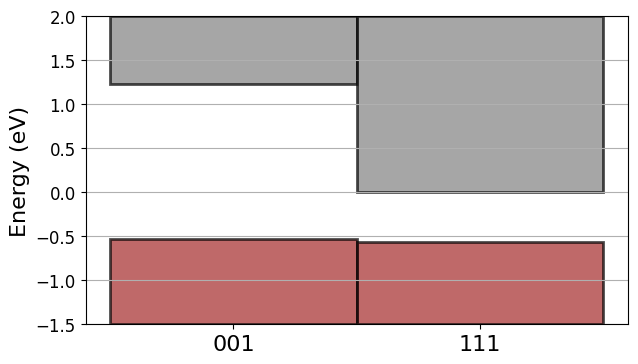

In [18]:
fig, ax_bar = plt.subplots(1,1, figsize = [7,4])
bottom = -1.5
top = 2
#BULK:
#ax_bar.bar(1, 3.1919 - bottom, color=VBC, label='Valence', bottom = bottom, width = 0.9, alpha = 0.7)
#ax_bar.bar(1, 4.8788 - top,  color=CBC, label='Conduction', bottom=top, width = 0.9, alpha = 0.7)
#001:
ax_bar.bar(2, -0.5361 - bottom, color=VBC, bottom = bottom, width = 1, alpha = 0.7, edgecolor = '0', linewidth = 2)
ax_bar.bar(2, 1.2266 - top,  color=CBC, bottom=top, width = 1, alpha = 0.7, edgecolor = '0', linewidth = 2)
#011:
#ax_bar.bar(3, 0.0593 - bottom, color=VBC, bottom = bottom, width = 1, alpha = 0.7, edgecolor = '0', linewidth = 2)
#ax_bar.bar(3, -0.1361  - top,  color=CBC, bottom=top, width = 1, alpha = 0.7, edgecolor = '0', linewidth = 2)
#111:
ax_bar.bar(3, -0.5686 - bottom, color=VBC, bottom = bottom, width = 1, alpha = 0.7, edgecolor = '0', linewidth = 2)
ax_bar.bar(3, 0.0057  - top,  color=CBC, bottom=top, width = 1, alpha = 0.7, edgecolor = '0', linewidth = 2)



ax_bar.set_xticks([2,3])
ax_bar.set_xticklabels(["001","111"],fontsize = 16)
ax_bar.tick_params(axis='y', labelsize=12)


# Set axis labels and title
ax_bar.set_ylabel('Energy (eV)',fontsize = 16)
#ax_bar.set_title('')
ax_bar.grid('--', axis = 'y')
# Show legend
#ax_bar.legend(fontsize = 16)

plt.savefig('bar_bands_001_111.png', dpi = 200)

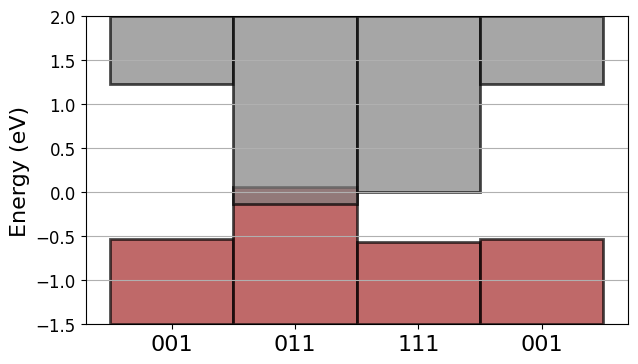

In [19]:
fig, ax_bar = plt.subplots(1,1, figsize = [7,4])
bottom = -1.5
top = 2
#BULK:
#ax_bar.bar(1, 3.1919 - bottom, color=VBC, label='Valence', bottom = bottom, width = 0.9, alpha = 0.7)
#ax_bar.bar(1, 4.8788 - top,  color=CBC, label='Conduction', bottom=top, width = 0.9, alpha = 0.7)
#001:
ax_bar.bar(2, -0.5361 - bottom, color=VBC, bottom = bottom, width = 1, alpha = 0.7, edgecolor = '0', linewidth = 2)
ax_bar.bar(2, 1.2266 - top,  color=CBC, bottom=top, width = 1, alpha = 0.7, edgecolor = '0', linewidth = 2)
#011:
ax_bar.bar(3, 0.0593 - bottom, color=VBC, bottom = bottom, width = 1, alpha = 0.7, edgecolor = '0', linewidth = 2)
ax_bar.bar(3, -0.1361  - top,  color=CBC, bottom=top, width = 1, alpha = 0.7, edgecolor = '0', linewidth = 2)
#111:
ax_bar.bar(4, -0.5686 - bottom, color=VBC, bottom = bottom, width = 1, alpha = 0.7, edgecolor = '0', linewidth = 2)
ax_bar.bar(4, 0.0057  - top,  color=CBC, bottom=top, width = 1, alpha = 0.7, edgecolor = '0', linewidth = 2)

#001:
ax_bar.bar(5, -0.5361 - bottom, color=VBC, bottom = bottom, width = 1, alpha = 0.7, edgecolor = '0', linewidth = 2)
ax_bar.bar(5, 1.2266 - top,  color=CBC, bottom=top, width = 1, alpha = 0.7, edgecolor = '0', linewidth = 2)


ax_bar.set_xticks([2,3, 4, 5])
ax_bar.set_xticklabels(["001","011","111", "001"],fontsize = 16)
ax_bar.tick_params(axis='y', labelsize=12)


# Set axis labels and title
ax_bar.set_ylabel('Energy (eV)',fontsize = 16)
#ax_bar.set_title('')
ax_bar.grid('--', axis = 'y')
# Show legend
#ax_bar.legend(fontsize = 16)

plt.savefig('bar_bands_001_011_111.png', dpi = 200)

# Carrier effective mass:

# Simplified

In [48]:
from scipy.optimize import curve_fit

### BULK

In [33]:
bandas = readband(r'CsPbBr3/band-cspbbr3.gnu')

In [34]:
indices = list(bandas['k'])
len(indices)

101

indice: 80
Band Gap = 1.6869 eV
pos bandas:  3.1919 e 4.8788


(1.7071, 3.2802)

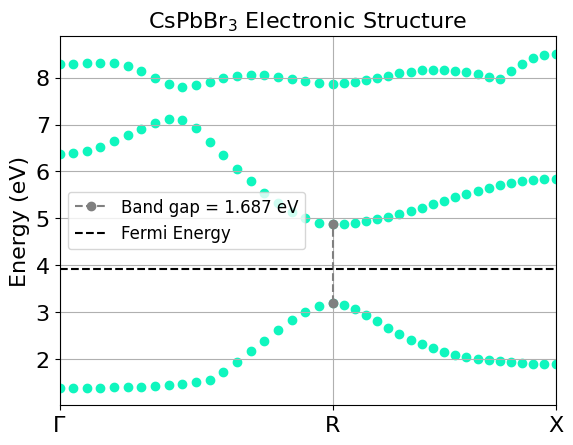

In [81]:
nbnd = len(bandas.keys())-1
k_nodes = [indices[0], indices[20], indices[40], indices[60], indices[80], indices[-1]]

fig, ax = plt.subplots(1, 1)

#for i in range(13,nbnd):
#    ax.plot(bandas['k'], bandas['e'+str(i)], c = '#0ff6be', linewidth = 2)
    
ax.scatter(bandas['k'], bandas['e21'], c = '#0ff6be') #Valence band
ax.scatter(bandas['k'], bandas['e22'], c = '#0ff6be') # conduction band
#ax.scatter(bandas['k'], bandas['e23'], c = '#0ff6be') # conduction band
fermi = 3.9128
# Band Gap:
bg = min(np.array(bandas['e22'])- np.array(bandas['e21']))
print('indice:', list(np.array(bandas['e22'])- np.array(bandas['e21'])).index(bg))
print('Band Gap =', bg, 'eV')
x1, y1 = bandas['k'][80], bandas['e21'][80]
x2, y2 = bandas['k'][80], bandas['e22'][80]
print('pos bandas: ',y1,'e', y2)
ax.plot([x1, x2], [y1, y2], color='0.5', linestyle='--', marker='o', label=f'Band gap = {bg:.3f} eV')
ax.set_xticks(k_nodes)
ax.set_xticklabels(["$\Gamma$","X","M", "$\Gamma$", 'R', 'X'], fontsize = 16)
ax.grid('--')
ax.set_title(r'CsPbBr$_3$ Electronic Structure', fontsize = 16)
ax.axhline(fermi, linestyle = '--', color = '0', label = 'Fermi Energy')
ax.legend(loc = 'center left', fontsize = 12)
ax.set_ylabel('Energy (eV)', fontsize = 16)
ax.tick_params(axis='y', labelsize=16)

ax.set_xlim(k_nodes[3], k_nodes[5])
#plt.savefig('CsPbBr3/banda_CsPbBr3.png', dpi = 200)

aCB1 =  11.090941684951247

aCB2 =  17.774886524692388

aCB3 =  24.071229658390784

aVB =  -21.05228445266318



Text(0.5, 1.0, 'Bulk')

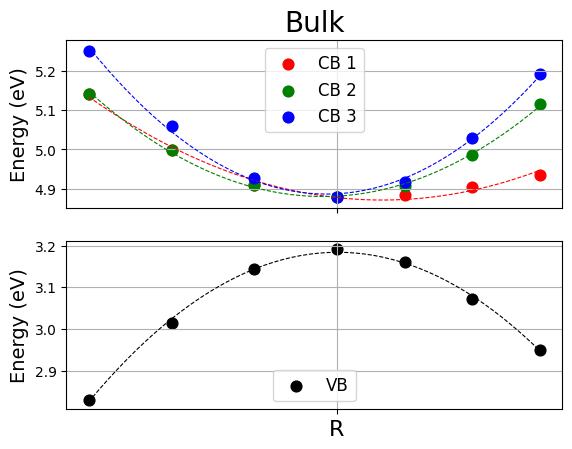

In [93]:


VB = [bandas['k'][80-3:80+4], bandas['e21'][80-3:80+4]]
CB = [bandas['k'][80-3:80+4], bandas['e22'][80-3:80+4]]
CB2 = [bandas['k'][80-3:80+4], bandas['e23'][80-3:80+4]]
CB3 = [bandas['k'][80-3:80+4], bandas['e24'][80-3:80+4]]


fig, [ax2, ax3] = plt.subplots(2, 1)

def parabola(x, a, b, c):
    return a * x**2 + b * x + c

# Sample data
x_data = np.array(CB[0])
y_data = np.array(CB[1])

# Perform curve fitting
params, covariance = curve_fit(parabola, x_data, y_data)

# Extract parameters
a_fit, b_fit, c_fit = params
print('aCB1 = ', a_fit)
print()
x_fit = np.linspace(x_data[0], x_data[-1])
y_fit = parabola(x_fit, a_fit, b_fit,c_fit)

ax2.set_xticks([k_nodes[4]])
ax2.set_xticklabels([])

ax2.plot(x_fit, y_fit, c = 'red', linewidth = .8, linestyle = '--')
ax2.scatter(CB[0], CB[1], c = 'red', s = 60, label = 'CB 1') #Valence band


# Sample data
x_data = np.array(CB2[0])
y_data = np.array(CB2[1])

# Perform curve fitting
params, covariance = curve_fit(parabola, x_data, y_data)

# Extract parameters
a_fit, b_fit, c_fit = params
print('aCB2 = ', a_fit)
print()

x_fit = np.linspace(x_data[0], x_data[-1])
y_fit = parabola(x_fit, a_fit, b_fit,c_fit)

ax2.plot(x_fit, y_fit, c = 'green', linewidth = .8, linestyle = '--')
ax2.scatter(CB2[0], CB2[1], c = 'green', s = 60, label = 'CB 2') #Valence band



# Sample data
x_data = np.array(CB3[0])
y_data = np.array(CB3[1])

# Perform curve fitting
params, covariance = curve_fit(parabola, x_data, y_data)

# Extract parameters
a_fit, b_fit, c_fit = params
print('aCB3 = ', a_fit)
print()
x_fit = np.linspace(x_data[0], x_data[-1])
y_fit = parabola(x_fit, a_fit, b_fit,c_fit)

ax2.plot(x_fit, y_fit, c = 'blue', linewidth = .8, linestyle = '--')
ax2.scatter(CB3[0], CB3[1], c = 'blue', s = 60, label = 'CB 3') #Valence band


#ax2.scatter(CB[0], CB[1], c = '#0ff6be') # conduction band
fermi = 3.9128
# Band Gap:
#bg = min(np.array(bandas['e22'])- np.array(bandas['e21']))
#print('indice:', list(np.array(bandas['e22'])- np.array(bandas['e21'])).index(bg))
#print('Band Gap =', bg, 'eV')
#x1, y1 = bandas['k'][80], bandas['e21'][80]
#x2, y2 = bandas['k'][80], bandas['e22'][80]
ax2.grid('--')
#ax2.axhline(fermi, linestyle = '--', color = '0', label = 'Fermi Energy')
ax2.legend(loc = 'upper center', fontsize = 12)
ax2.set_ylabel('Energy (eV)', fontsize = 14)


# Sample data
x_data = np.array(VB[0])
y_data = np.array(VB[1])

# Perform curve fitting
params, covariance = curve_fit(parabola, x_data, y_data)

# Extract parameters
a_fit, b_fit, c_fit = params
print('aVB = ', a_fit)
print()
x_fit = np.linspace(x_data[0], x_data[-1])
y_fit = parabola(x_fit, a_fit, b_fit,c_fit)
#for i in range(13,nbnd):
#    ax.plot(bandas['k'], bandas['e'+str(i)], c = '#0ff6be', linewidth = 2)
ax3.plot(x_fit, y_fit, c = '0', linewidth = .8, linestyle = '--')
    
ax3.scatter(VB[0], VB[1], c = '0', s = 60, label = 'VB') #Valence band
#ax3.scatter(CB[0], CB[1], c = '#0ff6be') # conduction band
fermi = 3.9128
ax3.set_xticks([k_nodes[4]])
ax3.set_xticklabels(['R'], fontsize = 16)
# Band Gap:
#bg = min(np.array(bandas['e22'])- np.array(bandas['e21']))
#print('indice:', list(np.array(bandas['e22'])- np.array(bandas['e21'])).index(bg))
#print('Band Gap =', bg, 'eV')
#x1, y1 = bandas['k'][80], bandas['e21'][80]
#x2, y2 = bandas['k'][80], bandas['e22'][80]
ax3.grid('--')
#ax3.axhline(fermi, linestyle = '--', color = '0', label = 'Fermi Energy')
ax3.legend(loc = 'lower center', fontsize = 12)
ax3.set_ylabel('Energy (eV)', fontsize = 14)
ax2.set_title('Bulk', fontsize = 20)

In [95]:
bandas = readband(r'BANDS/001/band-cspbbr3.gnu')

In [96]:
indices = list(bandas['k'])
len(indices)

91

indice: 75
Band Gap = 1.7627 eV
pos bandas:  -0.5361 e 1.2266


(2.0, 3.4142)

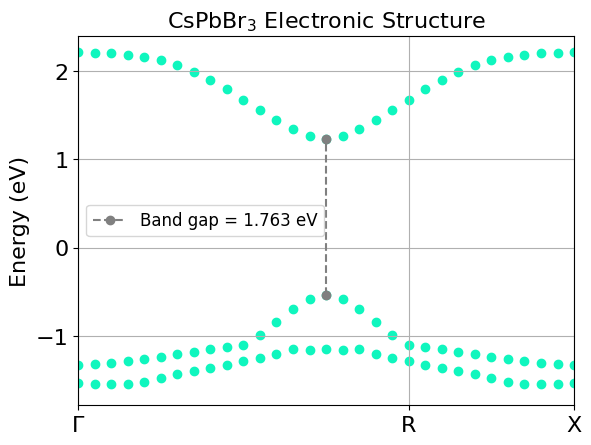

In [108]:
nbnd = len(bandas.keys())-1
k_nodes = [indices[0], indices[20], indices[40], indices[60], indices[80], indices[-1]]

fig, ax = plt.subplots(1, 1)

#for i in range(13,nbnd):
#    ax.plot(bandas['k'], bandas['e'+str(i)], c = '#0ff6be', linewidth = 2)
    
ax.scatter(bandas['k'], bandas['e87'], c = '#0ff6be') #Valence band
ax.scatter(bandas['k'], bandas['e88'], c = '#0ff6be') # conduction band
ax.scatter(bandas['k'], bandas['e85'], c = '#0ff6be') # conduction band

#ax.scatter(bandas['k'], bandas['e23'], c = '#0ff6be') # conduction band
fermi = 3.9128
# Band Gap:
bg = min(np.array(bandas['e88'])- np.array(bandas['e87']))
print('indice:', list(np.array(bandas['e88'])- np.array(bandas['e87'])).index(bg))
print('Band Gap =', bg, 'eV')
x1, y1 = bandas['k'][75], bandas['e87'][75]
x2, y2 = bandas['k'][75], bandas['e88'][75]
print('pos bandas: ',y1,'e', y2)
ax.plot([x1, x2], [y1, y2], color='0.5', linestyle='--', marker='o', label=f'Band gap = {bg:.3f} eV')
ax.set_xticks(k_nodes)
ax.set_xticklabels(["$\Gamma$","X","M", "$\Gamma$", 'R', 'X'], fontsize = 16)
ax.grid('--')
ax.set_title(r'CsPbBr$_3$ Electronic Structure', fontsize = 16)
#ax.axhline(fermi, linestyle = '--', color = '0', label = 'Fermi Energy')
ax.legend(loc = 'center left', fontsize = 12)
ax.set_ylabel('Energy (eV)', fontsize = 16)
ax.tick_params(axis='y', labelsize=16)

ax.set_xlim(k_nodes[3], k_nodes[5])
#plt.savefig('CsPbBr3/banda_CsPbBr3.png', dpi = 200)

aCB1 =  10.61820077085861

aCB2 =  16.07806682501099

aVB =  -14.793371797767605



Text(0.5, 1.0, '001')

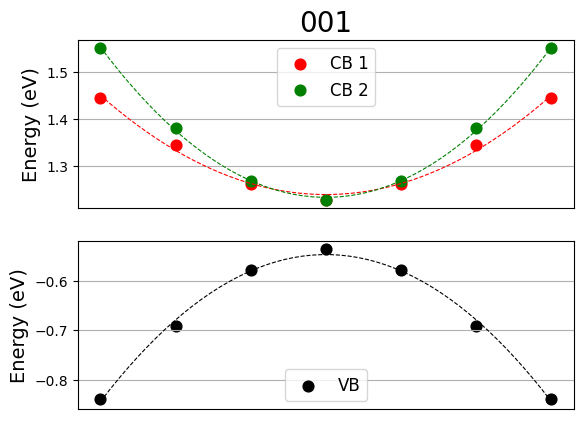

In [112]:


VB = [bandas['k'][75-3:75+4], bandas['e87'][75-3:75+4]]
CB = [bandas['k'][75-3:75+4], bandas['e88'][75-3:75+4]]
CB2 = [bandas['k'][75-3:75+4], bandas['e89'][75-3:75+4]]


fig, [ax2, ax3] = plt.subplots(2, 1)

def parabola(x, a, b, c):
    return a * x**2 + b * x + c

# Sample data
x_data = np.array(CB[0])
y_data = np.array(CB[1])

# Perform curve fitting
params, covariance = curve_fit(parabola, x_data, y_data)

# Extract parameters
a_fit, b_fit, c_fit = params
print('aCB1 = ', a_fit)
print()
x_fit = np.linspace(x_data[0], x_data[-1])
y_fit = parabola(x_fit, a_fit, b_fit,c_fit)

ax2.set_xticks([k_nodes[4]])
ax2.set_xticklabels([])

ax2.plot(x_fit, y_fit, c = 'red', linewidth = .8, linestyle = '--')
ax2.scatter(CB[0], CB[1], c = 'red', s = 60, label = 'CB 1') #Valence band


# Sample data
x_data = np.array(CB2[0])
y_data = np.array(CB2[1])

# Perform curve fitting
params, covariance = curve_fit(parabola, x_data, y_data)

# Extract parameters
a_fit, b_fit, c_fit = params
print('aCB2 = ', a_fit)
print()

x_fit = np.linspace(x_data[0], x_data[-1])
y_fit = parabola(x_fit, a_fit, b_fit,c_fit)

ax2.plot(x_fit, y_fit, c = 'green', linewidth = .8, linestyle = '--')
ax2.scatter(CB2[0], CB2[1], c = 'green', s = 60, label = 'CB 2') #Valence band




#ax2.scatter(CB[0], CB[1], c = '#0ff6be') # conduction band
#fermi = 3.9128
# Band Gap:
#bg = min(np.array(bandas['e22'])- np.array(bandas['e21']))
#print('indice:', list(np.array(bandas['e22'])- np.array(bandas['e21'])).index(bg))
#print('Band Gap =', bg, 'eV')
#x1, y1 = bandas['k'][80], bandas['e21'][80]
#x2, y2 = bandas['k'][80], bandas['e22'][80]
ax2.grid('--')
#ax2.axhline(fermi, linestyle = '--', color = '0', label = 'Fermi Energy')
ax2.legend(loc = 'upper center', fontsize = 12)
ax2.set_ylabel('Energy (eV)', fontsize = 14)


# Sample data
x_data = np.array(VB[0])
y_data = np.array(VB[1])

# Perform curve fitting
params, covariance = curve_fit(parabola, x_data, y_data)

# Extract parameters
a_fit, b_fit, c_fit = params
print('aVB = ', a_fit)
print()
x_fit = np.linspace(x_data[0], x_data[-1])
y_fit = parabola(x_fit, a_fit, b_fit,c_fit)
#for i in range(13,nbnd):
#    ax.plot(bandas['k'], bandas['e'+str(i)], c = '#0ff6be', linewidth = 2)
ax3.plot(x_fit, y_fit, c = '0', linewidth = .8, linestyle = '--')
    
ax3.scatter(VB[0], VB[1], c = '0', s = 60, label = 'VB') #Valence band
#ax3.scatter(CB[0], CB[1], c = '#0ff6be') # conduction band
fermi = 3.9128
ax3.set_xticks([])
#ax3.set_xticklabels(['R'], fontsize = 16)
# Band Gap:
#bg = min(np.array(bandas['e22'])- np.array(bandas['e21']))
#print('indice:', list(np.array(bandas['e22'])- np.array(bandas['e21'])).index(bg))
#print('Band Gap =', bg, 'eV')
#x1, y1 = bandas['k'][80], bandas['e21'][80]
#x2, y2 = bandas['k'][80], bandas['e22'][80]
ax3.grid('--')
#ax3.axhline(fermi, linestyle = '--', color = '0', label = 'Fermi Energy')
ax3.legend(loc = 'lower center', fontsize = 12)
ax3.set_ylabel('Energy (eV)', fontsize = 14)
ax2.set_title('001', fontsize = 20)

In [113]:
bandas = readband(r'BANDS/011/band-cspbbr3.gnu')

In [114]:
indices = list(bandas['k'])
len(indices)

91

indice: 74
Band Gap = 0.011899999999999994 eV
pos bandas:  0.0593 e 0.0779


(1.7125, 2.9404)

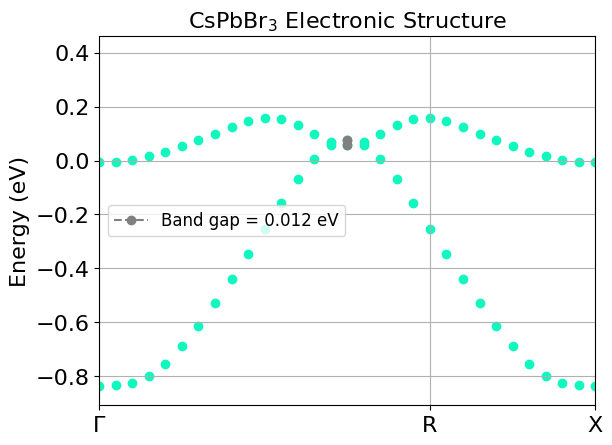

In [118]:
nbnd = len(bandas.keys())-1
k_nodes = [indices[0], indices[20], indices[40], indices[60], indices[80], indices[-1]]

fig, ax = plt.subplots(1, 1)

#for i in range(13,nbnd):
#    ax.plot(bandas['k'], bandas['e'+str(i)], c = '#0ff6be', linewidth = 2)
    
ax.scatter(bandas['k'], bandas['e87'], c = '#0ff6be') #Valence band
ax.scatter(bandas['k'], bandas['e88'], c = '#0ff6be') # conduction band
#ax.scatter(bandas['k'], bandas['e90'], c = '#0ff6be') # conduction band

#ax.scatter(bandas['k'], bandas['e23'], c = '#0ff6be') # conduction band
fermi = 3.9128
# Band Gap:
bg = min(np.array(bandas['e88'])- np.array(bandas['e87']))
print('indice:', list(np.array(bandas['e88'])- np.array(bandas['e87'])).index(bg))
print('Band Gap =', bg, 'eV')
x1, y1 = bandas['k'][75], bandas['e87'][75]
x2, y2 = bandas['k'][75], bandas['e88'][75]
print('pos bandas: ',y1,'e', y2)
ax.plot([x1, x2], [y1, y2], color='0.5', linestyle='--', marker='o', label=f'Band gap = {bg:.3f} eV')
ax.set_xticks(k_nodes)
ax.set_xticklabels(["$\Gamma$","X","M", "$\Gamma$", 'R', 'X'], fontsize = 16)
ax.grid('--')
ax.set_title(r'CsPbBr$_3$ Electronic Structure', fontsize = 16)
#ax.axhline(fermi, linestyle = '--', color = '0', label = 'Fermi Energy')
ax.legend(loc = 'center left', fontsize = 12)
ax.set_ylabel('Energy (eV)', fontsize = 16)
ax.tick_params(axis='y', labelsize=16)

ax.set_xlim(k_nodes[3], k_nodes[5])
#plt.savefig('CsPbBr3/banda_CsPbBr3.png', dpi = 200)

aCB1 =  4.170174431659754

aVB =  -9.14405708303809



Text(0.5, 1.0, '011')

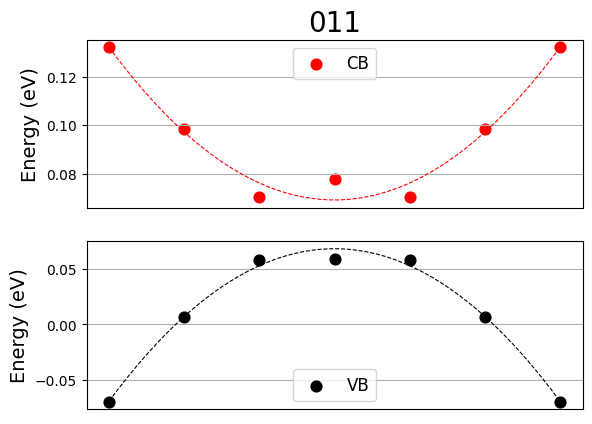

In [121]:
VB = [bandas['k'][75-3:75+4], bandas['e87'][75-3:75+4]]
CB = [bandas['k'][75-3:75+4], bandas['e88'][75-3:75+4]]


fig, [ax2, ax3] = plt.subplots(2, 1)

def parabola(x, a, b, c):
    return a * x**2 + b * x + c

# Sample data
x_data = np.array(CB[0])
y_data = np.array(CB[1])

# Perform curve fitting
params, covariance = curve_fit(parabola, x_data, y_data)

# Extract parameters
a_fit, b_fit, c_fit = params
print('aCB1 = ', a_fit)
print()
x_fit = np.linspace(x_data[0], x_data[-1])
y_fit = parabola(x_fit, a_fit, b_fit,c_fit)

ax2.set_xticks([k_nodes[4]])
ax2.set_xticklabels([])

ax2.plot(x_fit, y_fit, c = 'red', linewidth = .8, linestyle = '--')
ax2.scatter(CB[0], CB[1], c = 'red', s = 60, label = 'CB') #Valence band





#ax2.scatter(CB[0], CB[1], c = '#0ff6be') # conduction band
#fermi = 3.9128
# Band Gap:
#bg = min(np.array(bandas['e22'])- np.array(bandas['e21']))
#print('indice:', list(np.array(bandas['e22'])- np.array(bandas['e21'])).index(bg))
#print('Band Gap =', bg, 'eV')
#x1, y1 = bandas['k'][80], bandas['e21'][80]
#x2, y2 = bandas['k'][80], bandas['e22'][80]
ax2.grid('--')
#ax2.axhline(fermi, linestyle = '--', color = '0', label = 'Fermi Energy')
ax2.legend(loc = 'upper center', fontsize = 12)
ax2.set_ylabel('Energy (eV)', fontsize = 14)


# Sample data
x_data = np.array(VB[0])
y_data = np.array(VB[1])

# Perform curve fitting
params, covariance = curve_fit(parabola, x_data, y_data)

# Extract parameters
a_fit, b_fit, c_fit = params
print('aVB = ', a_fit)
print()
x_fit = np.linspace(x_data[0], x_data[-1])
y_fit = parabola(x_fit, a_fit, b_fit,c_fit)
#for i in range(13,nbnd):
#    ax.plot(bandas['k'], bandas['e'+str(i)], c = '#0ff6be', linewidth = 2)
ax3.plot(x_fit, y_fit, c = '0', linewidth = .8, linestyle = '--')
    
ax3.scatter(VB[0], VB[1], c = '0', s = 60, label = 'VB') #Valence band
#ax3.scatter(CB[0], CB[1], c = '#0ff6be') # conduction band
fermi = 3.9128
ax3.set_xticks([])
#ax3.set_xticklabels(['R'], fontsize = 16)
# Band Gap:
#bg = min(np.array(bandas['e22'])- np.array(bandas['e21']))
#print('indice:', list(np.array(bandas['e22'])- np.array(bandas['e21'])).index(bg))
#print('Band Gap =', bg, 'eV')
#x1, y1 = bandas['k'][80], bandas['e21'][80]
#x2, y2 = bandas['k'][80], bandas['e22'][80]
ax3.grid('--')
#ax3.axhline(fermi, linestyle = '--', color = '0', label = 'Fermi Energy')
ax3.legend(loc = 'lower center', fontsize = 12)
ax3.set_ylabel('Energy (eV)', fontsize = 14)
ax2.set_title('011', fontsize = 20)

In [122]:
bandas = readband(r'BANDS/111/band-cspbbr3.gnu')

In [123]:
indices = list(bandas['k'])
len(indices)

91

indice: 70
Band Gap = 0.741 eV
pos bandas:  -0.6249 e 0.1161


(0.918, 1.591)

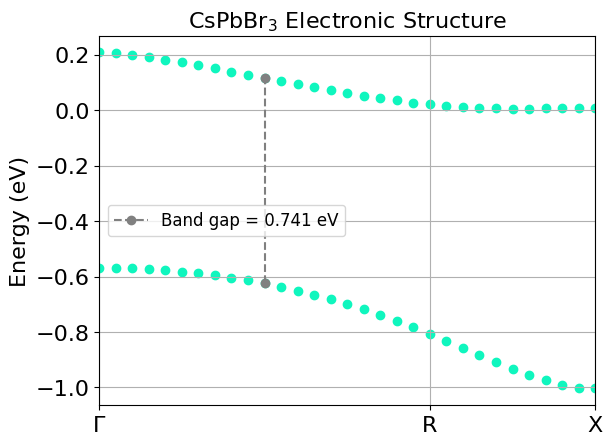

In [125]:
nbnd = len(bandas.keys())-1
k_nodes = [indices[0], indices[20], indices[40], indices[60], indices[80], indices[-1]]

fig, ax = plt.subplots(1, 1)

#for i in range(13,nbnd):
#    ax.plot(bandas['k'], bandas['e'+str(i)], c = '#0ff6be', linewidth = 2)
    
ax.scatter(bandas['k'], bandas['e87'], c = '#0ff6be') #Valence band
ax.scatter(bandas['k'], bandas['e88'], c = '#0ff6be') # conduction band
#ax.scatter(bandas['k'], bandas['e90'], c = '#0ff6be') # conduction band

#ax.scatter(bandas['k'], bandas['e23'], c = '#0ff6be') # conduction band
fermi = 3.9128
# Band Gap:
bg = min(np.array(bandas['e88'])- np.array(bandas['e87']))
print('indice:', list(np.array(bandas['e88'])- np.array(bandas['e87'])).index(bg))
print('Band Gap =', bg, 'eV')
x1, y1 = bandas['k'][70], bandas['e87'][70]
x2, y2 = bandas['k'][70], bandas['e88'][70]
print('pos bandas: ',y1,'e', y2)
ax.plot([x1, x2], [y1, y2], color='0.5', linestyle='--', marker='o', label=f'Band gap = {bg:.3f} eV')
ax.set_xticks(k_nodes)
ax.set_xticklabels(["$\Gamma$","X","M", "$\Gamma$", 'R', 'X'], fontsize = 16)
ax.grid('--')
ax.set_title(r'CsPbBr$_3$ Electronic Structure', fontsize = 16)
#ax.axhline(fermi, linestyle = '--', color = '0', label = 'Fermi Energy')
ax.legend(loc = 'center left', fontsize = 12)
ax.set_ylabel('Energy (eV)', fontsize = 16)
ax.tick_params(axis='y', labelsize=16)

ax.set_xlim(k_nodes[3], k_nodes[5])
#plt.savefig('CsPbBr3/banda_CsPbBr3.png', dpi = 200)

aCB1 =  0.12298558428914376

aVB =  -1.2558437986700541



Text(0.5, 1.0, '111')

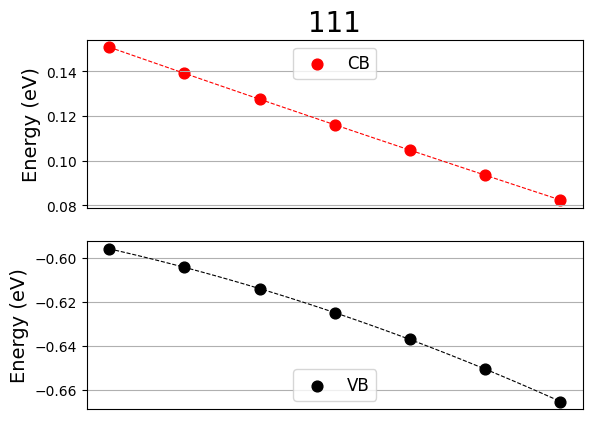

In [128]:
VB = [bandas['k'][70-3:70+4], bandas['e87'][70-3:70+4]]
CB = [bandas['k'][70-3:70+4], bandas['e88'][70-3:70+4]]


fig, [ax2, ax3] = plt.subplots(2, 1)

def parabola(x, a, b, c):
    return a * x**2 + b * x + c

# Sample data
x_data = np.array(CB[0])
y_data = np.array(CB[1])

# Perform curve fitting
params, covariance = curve_fit(parabola, x_data, y_data)

# Extract parameters
a_fit, b_fit, c_fit = params
print('aCB1 = ', a_fit)
print()
x_fit = np.linspace(x_data[0], x_data[-1])
y_fit = parabola(x_fit, a_fit, b_fit,c_fit)

ax2.set_xticks([k_nodes[4]])
ax2.set_xticklabels([])

ax2.plot(x_fit, y_fit, c = 'red', linewidth = .8, linestyle = '--')
ax2.scatter(CB[0], CB[1], c = 'red', s = 60, label = 'CB') #Valence band





#ax2.scatter(CB[0], CB[1], c = '#0ff6be') # conduction band
#fermi = 3.9128
# Band Gap:
#bg = min(np.array(bandas['e22'])- np.array(bandas['e21']))
#print('indice:', list(np.array(bandas['e22'])- np.array(bandas['e21'])).index(bg))
#print('Band Gap =', bg, 'eV')
#x1, y1 = bandas['k'][80], bandas['e21'][80]
#x2, y2 = bandas['k'][80], bandas['e22'][80]
ax2.grid('--')
#ax2.axhline(fermi, linestyle = '--', color = '0', label = 'Fermi Energy')
ax2.legend(loc = 'upper center', fontsize = 12)
ax2.set_ylabel('Energy (eV)', fontsize = 14)


# Sample data
x_data = np.array(VB[0])
y_data = np.array(VB[1])

# Perform curve fitting
params, covariance = curve_fit(parabola, x_data, y_data)

# Extract parameters
a_fit, b_fit, c_fit = params
print('aVB = ', a_fit)
print()
x_fit = np.linspace(x_data[0], x_data[-1])
y_fit = parabola(x_fit, a_fit, b_fit,c_fit)
#for i in range(13,nbnd):
#    ax.plot(bandas['k'], bandas['e'+str(i)], c = '#0ff6be', linewidth = 2)
ax3.plot(x_fit, y_fit, c = '0', linewidth = .8, linestyle = '--')
    
ax3.scatter(VB[0], VB[1], c = '0', s = 60, label = 'VB') #Valence band
#ax3.scatter(CB[0], CB[1], c = '#0ff6be') # conduction band
fermi = 3.9128
ax3.set_xticks([])
#ax3.set_xticklabels(['R'], fontsize = 16)
# Band Gap:
#bg = min(np.array(bandas['e22'])- np.array(bandas['e21']))
#print('indice:', list(np.array(bandas['e22'])- np.array(bandas['e21'])).index(bg))
#print('Band Gap =', bg, 'eV')
#x1, y1 = bandas['k'][80], bandas['e21'][80]
#x2, y2 = bandas['k'][80], bandas['e22'][80]
ax3.grid('--')
#ax3.axhline(fermi, linestyle = '--', color = '0', label = 'Fermi Energy')
ax3.legend(loc = 'lower center', fontsize = 12)
ax3.set_ylabel('Energy (eV)', fontsize = 14)
ax2.set_title('111', fontsize = 20)